# Supervised Learning Project
# Time Series Forecasting of Stocks

<b>Rishabh Kaushick</b> <br>
College of Engineering <br>
Northeastern University <br>
Toronto, ON <br>
kaushick.r@northeastern.edu

## Downloading The Dataset from Hugging Face

In [1]:
%pip install --upgrade huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
# installing the pyarrow & fastrarquet libraries for being able to read the .parquet file
!pip install pyarrow
!pip install fastparquet

In [3]:
from huggingface_hub import hf_hub_download
import pandas as pd
import pyarrow
import fastparquet

REPO_ID = "edarchimbaud/timeseries-1d-stocks"
FILENAME_1 = "data/train-00000-of-00002-b533cd2d30403f22.parquet"
FILENAME_2 = "data/train-00001-of-00002-42f4770dd00acdb4.parquet"


# since the data is in paraquet format, we read it using read_parquet() function in pandas
dataset_1 = pd.read_parquet(
    hf_hub_download(repo_id=REPO_ID, filename=FILENAME_1, repo_type="dataset"),
    engine='pyarrow')
dataset_2 = pd.read_parquet(
    hf_hub_download(repo_id=REPO_ID, filename=FILENAME_2, repo_type="dataset"),
    engine='pyarrow')

## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [5]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267714 entries, 0 to 4267713
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   date       object 
 2   open       float64
 3   high       float64
 4   low        float64
 5   close      float64
 6   adj_close  float64
 7   volume     float64
dtypes: float64(6), object(2)
memory usage: 260.5+ MB


In [6]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267713 entries, 0 to 4267712
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   date       object 
 2   open       float64
 3   high       float64
 4   low        float64
 5   close      float64
 6   adj_close  float64
 7   volume     float64
dtypes: float64(6), object(2)
memory usage: 260.5+ MB


In [7]:
dataset_1.head(10)

,symbol,date,open,high,low,close,adj_close,volume
0,A,1999-11-18,32.546494,35.765381,28.612303,31.473534,26.740845,62546380.0
1,A,1999-11-19,30.713518,30.758226,28.478184,28.880545,24.537767,15234146.0
2,A,1999-11-22,29.551144,31.473534,28.657009,31.473534,26.740845,6577870.0
3,A,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.309862,5975611.0
4,A,1999-11-24,28.701717,29.998213,28.612303,29.372318,24.955589,4843231.0
5,A,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.031565,1729466.0
6,A,1999-11-29,29.327612,30.355865,29.014664,30.132332,25.601316,4074751.0
7,A,1999-11-30,30.042917,30.713518,29.282904,30.177038,25.639301,4310034.0
8,A,1999-12-01,30.177038,31.071173,29.953505,30.713518,26.095110,2957329.0
9,A,1999-12-02,31.294706,32.188843,30.892345,31.562946,26.816814,3069868.0


In [8]:
dataset_2.head(10)

,symbol,date,open,high,low,close,adj_close,volume
0,JEF,1994-05-16,5.302348,5.447618,5.302348,5.411300,2.218184,170028.0
1,JEF,1994-05-17,5.411300,5.411300,5.374983,5.411300,2.218184,22028.0
2,JEF,1994-05-18,5.429459,5.429459,5.393142,5.429459,2.225627,55758.0
3,JEF,1994-05-19,5.411300,5.429459,5.411300,5.429459,2.225627,115647.0
4,JEF,1994-05-20,5.411300,5.429459,5.374983,5.393142,2.210740,139740.0
5,JEF,1994-05-23,5.393142,5.411300,5.374983,5.393142,2.210740,150066.0
6,JEF,1994-05-24,5.429459,5.429459,5.393142,5.411300,2.218184,187926.0
7,JEF,1994-05-25,5.429459,5.429459,5.411300,5.429459,2.225627,126661.0
8,JEF,1994-05-26,5.447618,5.447618,5.429459,5.429459,2.225627,72968.0
9,JEF,1994-05-27,5.447618,5.502094,5.447618,5.502094,2.255402,60577.0


From this we understand that the data is split into two files containing 4.2 million data points each, therefore we have a total of 8.4 million rows of data.

In [9]:
# Let us concat these two pandas data frame objects together
dataframe = pd.concat([dataset_1, dataset_2])

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8535427 entries, 0 to 4267712
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   date       object 
 2   open       float64
 3   high       float64
 4   low        float64
 5   close      float64
 6   adj_close  float64
 7   volume     float64
dtypes: float64(6), object(2)
memory usage: 586.1+ MB


In [11]:
dataframe.head(-10)

,symbol,date,open,high,low,close,adj_close,volume
0,A,1999-11-18,32.546494,35.765381,28.612303,31.473534,26.740845,62546380.0
1,A,1999-11-19,30.713518,30.758226,28.478184,28.880545,24.537767,15234146.0
2,A,1999-11-22,29.551144,31.473534,28.657009,31.473534,26.740845,6577870.0
3,A,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.309862,5975611.0
4,A,1999-11-24,28.701717,29.998213,28.612303,29.372318,24.955589,4843231.0
...,...,...,...,...,...,...,...,...
4267698,ZTS,2023-10-31,157.509995,158.529999,156.089996,157.000000,157.000000,3208900.0
4267699,ZTS,2023-11-01,156.419998,157.000000,151.029999,151.440002,151.440002,7269900.0
4267700,ZTS,2023-11-02,155.309998,161.830002,155.220001,160.910004,160.910004,4137800.0
4267701,ZTS,2023-11-03,164.250000,164.720001,159.369995,162.229996,162.229996,1974700.0


While working with time-series datasets, it is important to set the index as the date column

In [12]:
# converting the date column from object (string) to date
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8535427 entries, 0 to 4267712
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   symbol     object        
 1   date       datetime64[ns]
 2   open       float64       
 3   high       float64       
 4   low        float64       
 5   close      float64       
 6   adj_close  float64       
 7   volume     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 586.1+ MB


In [13]:
# set index to the date column
dataframe.set_index('date', inplace=True)
dataframe.head(-10)

,symbol,open,high,low,close,adj_close,volume
date,,,,,,,
1999-11-18,A,32.546494,35.765381,28.612303,31.473534,26.740845,62546380.0
1999-11-19,A,30.713518,30.758226,28.478184,28.880545,24.537767,15234146.0
1999-11-22,A,29.551144,31.473534,28.657009,31.473534,26.740845,6577870.0
1999-11-23,A,30.400572,31.205294,28.612303,28.612303,24.309862,5975611.0
1999-11-24,A,28.701717,29.998213,28.612303,29.372318,24.955589,4843231.0
...,...,...,...,...,...,...,...
2023-10-31,ZTS,157.509995,158.529999,156.089996,157.000000,157.000000,3208900.0
2023-11-01,ZTS,156.419998,157.000000,151.029999,151.440002,151.440002,7269900.0
2023-11-02,ZTS,155.309998,161.830002,155.220001,160.910004,160.910004,4137800.0


In [14]:
dataframe.sort_index()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   open       float64
 2   high       float64
 3   low        float64
 4   close      float64
 5   adj_close  float64
 6   volume     float64
dtypes: float64(6), object(1)
memory usage: 521.0+ MB


From the above, we can see that the data that we have ranges from 1999 to 2023

In [15]:
# symbol
dataframe['symbol'].value_counts()

symbol
SNA      11066
DD       11066
GE       11066
GD       11066
BK       11066
         ...  
CETY       212
CVKD       211
GNLX       207
NFTG       193
METCB      107
Name: count, Length: 1490, dtype: int64

In [16]:
dataframe.describe()

,open,high,low,close,adj_close,volume
count,8.535225e+06,8.535225e+06,8.535225e+06,8.535225e+06,8.535225e+06,8.535225e+06
mean,2.631397e+06,2.755787e+06,2.480572e+06,2.632311e+06,2.632253e+06,2.904656e+06
std,3.978107e+08,4.143375e+08,3.742684e+08,3.973853e+08,3.973853e+08,2.030013e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.750000e+00,8.300000e+00,8.000000e+00,8.150000e+00,4.980000e+00,4.700000e+04
50%,1.995000e+01,2.048000e+01,1.987000e+01,2.016000e+01,1.433110e+01,4.096000e+05
75%,4.514205e+01,4.600000e+01,4.476000e+01,4.538715e+01,3.635171e+01,1.757289e+06
max,1.356750e+11,1.370250e+11,1.275750e+11,1.363500e+11,1.363500e+11,7.421641e+09


In [17]:
# Since we are working on a huge amounts of data, let us start with the top 10 stocks first.

# Let us look at the big 5 stocks today - MSFT, AAPL, NVDA, AMZN, META
top10_stocks = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'TSLA', 'GOOG', 'BRK.B', 'META', 'UNH']

top10_stocks_df = dataframe[dataframe['symbol'].isin(top10_stocks)]
top10_stocks_df.head(-15)

,symbol,open,high,low,close,adj_close,volume
date,,,,,,,
1980-12-12,AAPL,0.128348,0.128906,0.128348,0.128348,0.099319,469033600.0
1980-12-15,AAPL,0.122210,0.122210,0.121652,0.121652,0.094137,175884800.0
1980-12-16,AAPL,0.113281,0.113281,0.112723,0.112723,0.087228,105728000.0
1980-12-17,AAPL,0.115513,0.116071,0.115513,0.115513,0.089387,86441600.0
1980-12-18,AAPL,0.118862,0.119420,0.118862,0.118862,0.091978,73449600.0
...,...,...,...,...,...,...,...
2023-10-24,UNH,522.859985,530.669983,522.070007,525.000000,525.000000,1978200.0
2023-10-25,UNH,527.270020,532.359985,520.080017,530.210022,530.210022,2380100.0
2023-10-26,UNH,525.700012,530.469971,522.520020,528.359985,528.359985,2675800.0


For just the top 10 stocks, we can see there are a total of 65,983 rows.

In [18]:
top10_stocks_df.describe()

,open,high,low,close,adj_close,volume
count,65998.000000,65998.000000,65998.000000,65998.000000,65998.000000,6.599800e+04
mean,58.699442,59.375964,58.013899,58.713984,56.898427,1.062464e+08
std,87.958220,88.957731,86.920009,87.959971,87.155033,1.892406e+08
min,0.000000,0.049665,0.049107,0.049107,0.038000,0.000000e+00
25%,3.387768,3.462500,3.317813,3.392589,3.018951,1.239645e+07
50%,23.838750,24.148215,23.507166,23.830000,19.102009,4.905400e+07
75%,70.447498,71.303751,69.607500,70.565001,67.462623,1.132760e+08
max,555.000000,558.099976,550.130005,555.150024,547.095398,7.421641e+09


<Axes: title={'center': 'Opening Price for Apple'}, xlabel='date', ylabel='Opening Price ($)'>

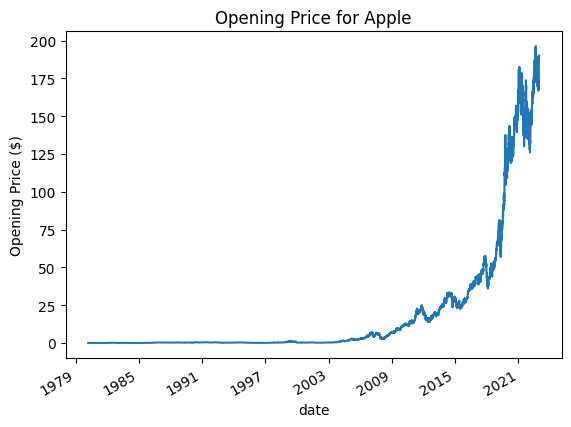

In [19]:
import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2200))
plt.ylabel('Opening Price ($)')
plt.xlabel('date')
plt.title('Opening Price for Apple')
top10_stocks_df['open'].loc[top10_stocks_df['symbol'] == 'AAPL'].plot()

/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/4286693961.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/4286693961.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/4286693961.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/4286693961.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/4286693961.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/4286693961.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/428669

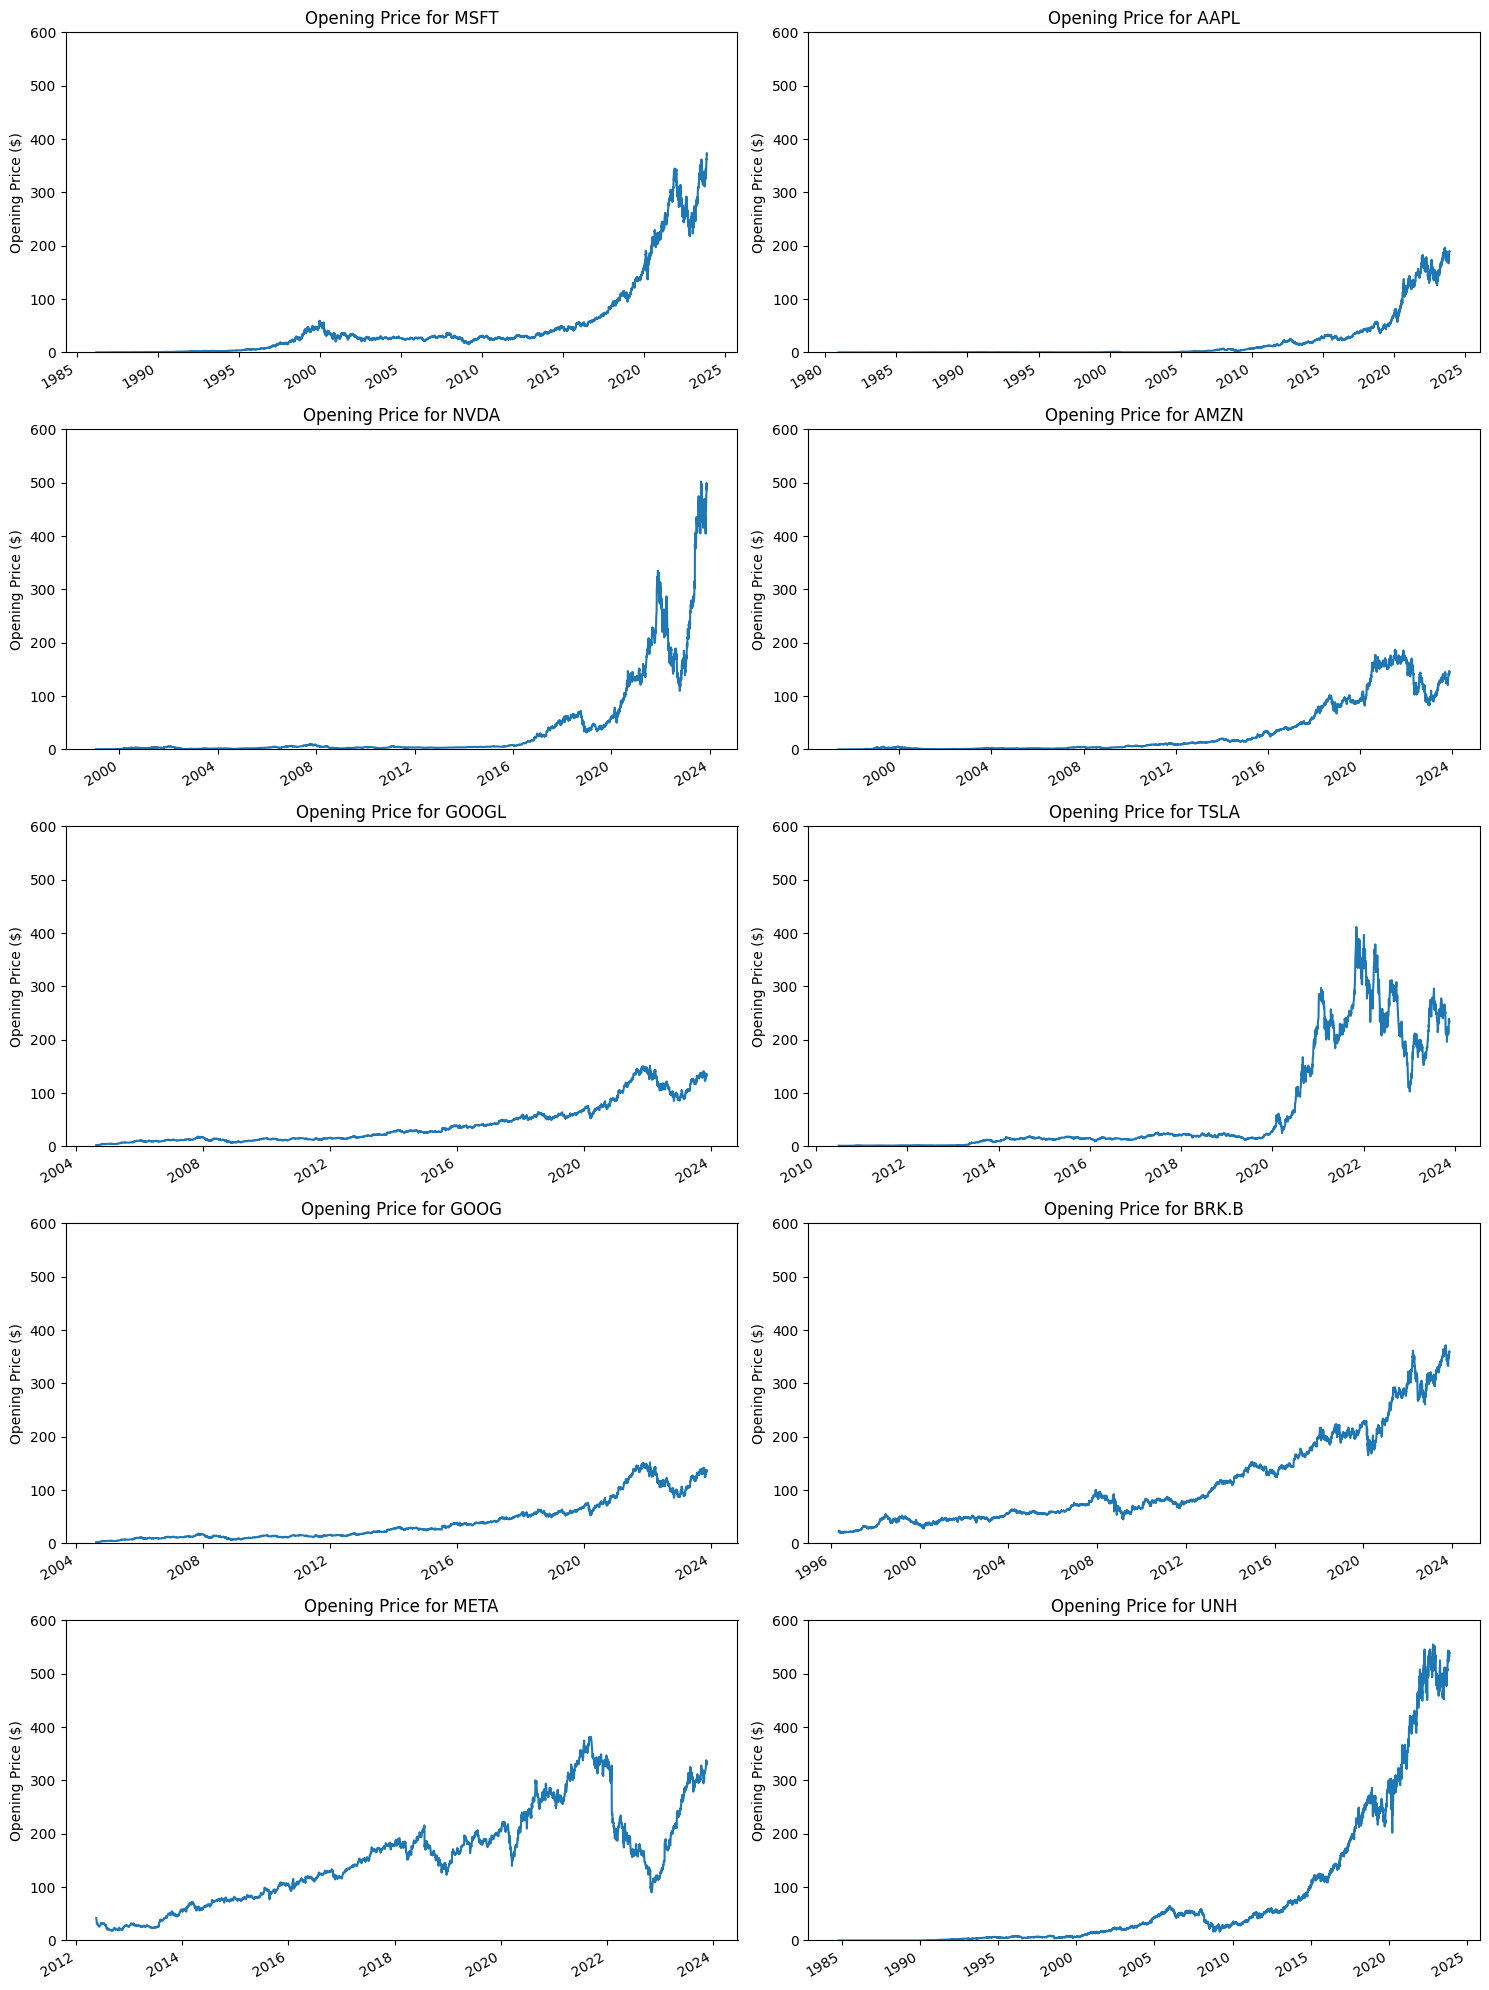

In [20]:
# looping through top 5 stocks
plt.figure(figsize=(15, 20))

for indx, stock in enumerate(top10_stocks):
    plt.subplot(5, 2, indx+1)
    top10_stocks_df['open'].loc[top10_stocks_df['symbol'] == stock].plot()
    plt.ylabel('Opening Price ($)')
    plt.xlabel(None)
    plt.title('Opening Price for '+str(stock))
    plt.ylim(0, 600)
    # plt.xlim(-500, 10000)
    plt.tight_layout()

Text(0.5, 1.0, 'Daily Open & Close Prices for Apple')

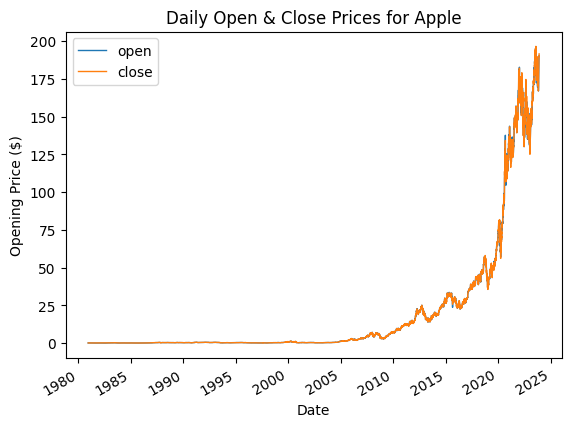

In [21]:
top10_stocks_df[['open', 'close']].loc[top10_stocks_df['symbol'] == 'AAPL'].plot(linewidth=1.0)
plt.ylabel('Opening Price ($)')
plt.xlabel('Date')
plt.title('Daily Open & Close Prices for Apple')


Let us zoom into the above graph to get a better look.

Text(0.5, 1.0, 'Daily Open & Close Prices for Apple')

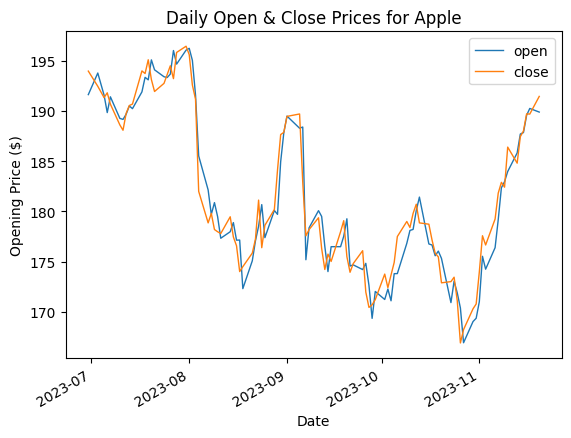

In [22]:
# zooming into the graph for the most recent 100 results
top10_stocks_df[['open', 'close']].loc[top10_stocks_df['symbol'] == 'AAPL'][-100:].plot(linewidth=1.0)
plt.ylabel('Opening Price ($)')
plt.xlabel('Date')
plt.title('Daily Open & Close Prices for Apple')

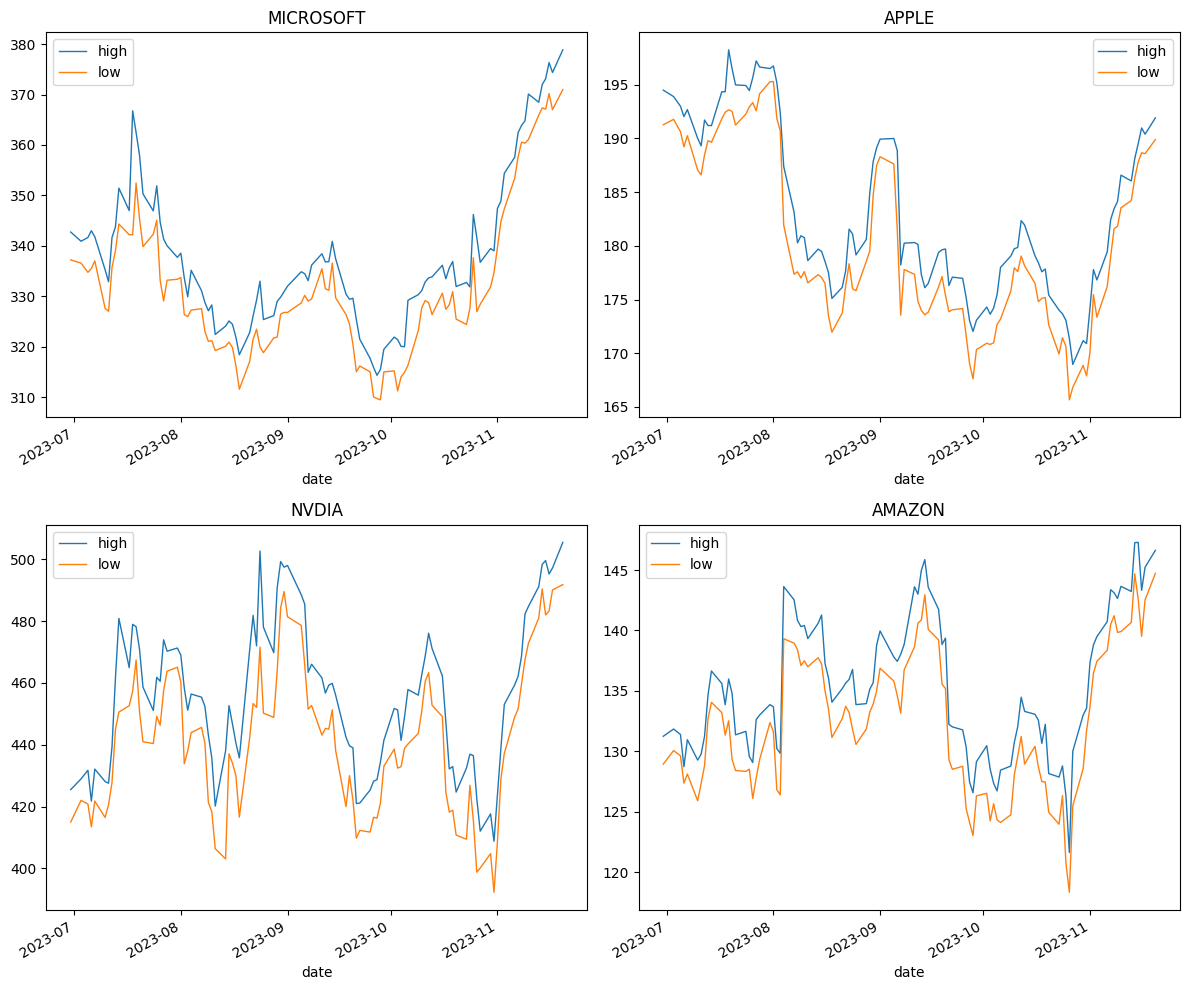

In [23]:
# Let us plot the high & low price 
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(12)

# ['MSFT', 'AAPL', 'NVDA', 'AMZN']

top10_stocks_df[['high', 'low' ]].loc[top10_stocks_df['symbol'] == 'MSFT'][-100:].plot(ax=axes[0,0], linewidth=1.0)
axes[0,0].set_title('MICROSOFT')

top10_stocks_df[['high', 'low']].loc[top10_stocks_df['symbol'] == 'AAPL'][-100:].plot(ax=axes[0,1], linewidth=1.0)
axes[0,1].set_title('APPLE')

top10_stocks_df[['high', 'low']].loc[top10_stocks_df['symbol'] == 'NVDA'][-100:].plot(ax=axes[1,0], linewidth=1.0)
axes[1,0].set_title('NVDIA')

top10_stocks_df[['high', 'low']].loc[top10_stocks_df['symbol'] == 'AMZN'][-100:].plot(ax=axes[1,1], linewidth=1.0)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

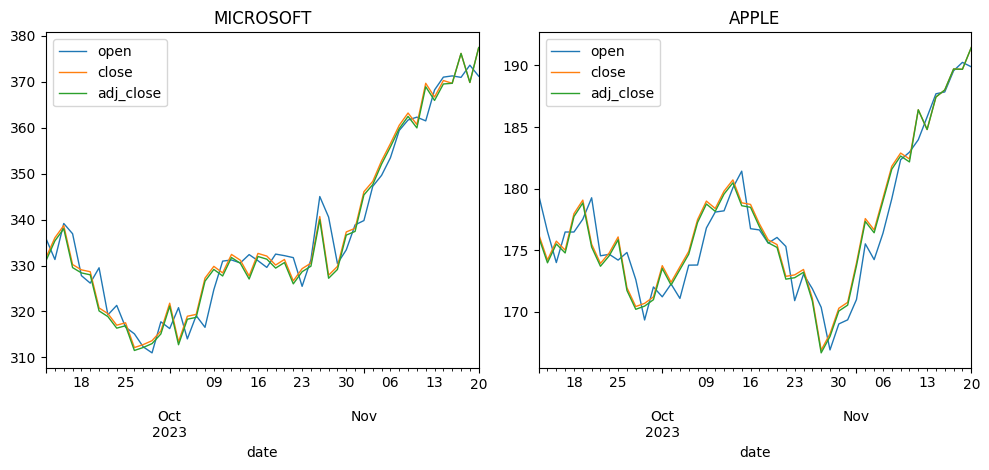

In [24]:
# Let us plot the opening, closing & adjusted closing price
fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_figheight(8)
fig.set_figwidth(10)
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2200))

# ['MSFT', 'AAPL', 'NVDA', 'AMZN']

top10_stocks_df[['open', 'close', 'adj_close' ]].loc[top10_stocks_df['symbol'] == 'MSFT'][-50:].plot(ax=axes[0], linewidth=1.0)
axes[0].set_title('MICROSOFT')

top10_stocks_df[['open', 'close', 'adj_close']].loc[top10_stocks_df['symbol'] == 'AAPL'][-50:].plot(ax=axes[1], linewidth=1.0)
axes[1].set_title('APPLE')

fig.tight_layout()

From the above, we can see that Microsoft had a lower adjusted closing price (as shown in green line) compared to the actual closing price (as shown in orange line).

<Axes: xlabel='date'>

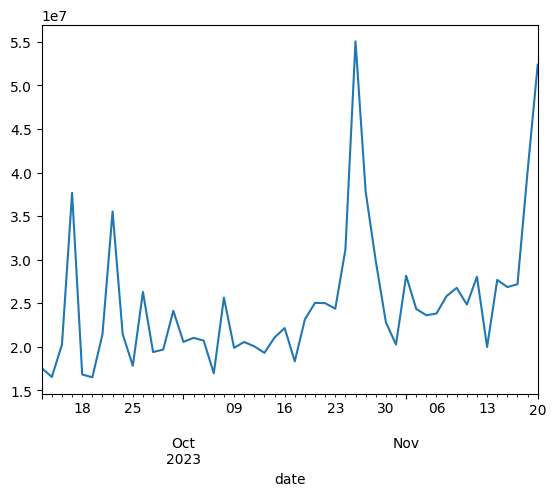

In [25]:
top10_stocks_df['volume'].loc[top10_stocks_df['symbol'] == 'MSFT'][-50:].plot(linewidth=1.5)

## Correlation Matrix

In [26]:
corr_matrix = top10_stocks_df.drop(columns=['symbol']).corr()
corr_matrix

,open,high,low,close,adj_close,volume
open,1.000000,0.999903,0.999887,0.999796,0.998963,-0.240197
high,0.999903,1.000000,0.999833,0.999894,0.999086,-0.239625
low,0.999887,0.999833,1.000000,0.999895,0.999034,-0.240953
close,0.999796,0.999894,0.999895,1.000000,0.999165,-0.240290
adj_close,0.998963,0.999086,0.999034,0.999165,1.000000,-0.236320
volume,-0.240197,-0.239625,-0.240953,-0.240290,-0.236320,1.000000


In [27]:
corr_matrix.style.background_gradient()

,open,high,low,close,adj_close,volume
open,1.000000,0.999903,0.999887,0.999796,0.998963,-0.240197
high,0.999903,1.000000,0.999833,0.999894,0.999086,-0.239625
low,0.999887,0.999833,1.000000,0.999895,0.999034,-0.240953
close,0.999796,0.999894,0.999895,1.000000,0.999165,-0.240290
adj_close,0.998963,0.999086,0.999034,0.999165,1.000000,-0.236320
volume,-0.240197,-0.239625,-0.240953,-0.240290,-0.236320,1.000000


Let us look at the data only for 'Apple' and see whether the data for that is also highly correrlated.

In [28]:
corr_matrix = top10_stocks_df.drop(columns=['symbol']).loc[top10_stocks_df['symbol'] == 'AAPL'].corr()
corr_matrix.style.background_gradient()

,open,high,low,close,adj_close,volume
open,1.000000,0.999946,0.999934,0.999863,0.999624,-0.238231
high,0.999946,1.000000,0.999921,0.999935,0.999704,-0.237810
low,0.999934,0.999921,1.000000,0.999938,0.999701,-0.238915
close,0.999863,0.999935,0.999938,1.000000,0.999767,-0.238376
adj_close,0.999624,0.999704,0.999701,0.999767,1.000000,-0.240322
volume,-0.238231,-0.237810,-0.238915,-0.238376,-0.240322,1.000000


In [29]:
corr_matrix = top10_stocks_df.drop(columns=['symbol', 'adj_close']).loc[top10_stocks_df['symbol'] == 'AAPL'].corr()
corr_matrix.style.background_gradient()

,open,high,low,close,volume
open,1.000000,0.999946,0.999934,0.999863,-0.238231
high,0.999946,1.000000,0.999921,0.999935,-0.237810
low,0.999934,0.999921,1.000000,0.999938,-0.238915
close,0.999863,0.999935,0.999938,1.000000,-0.238376
volume,-0.238231,-0.237810,-0.238915,-0.238376,1.000000


We must fix this problem of this high correlated data. We will fix it during the feature engineering part of this project.

# Data Pre-Processing
## Checking Null Values
Initially this entire process was performed on the entire dataset. However, since this dataset was very large the machine learning models were vey complex and took too many hours to train. In response to this I have decided to use one specific stock - Apple, and I will forecast the closing price.

In [30]:
aapl_df = top10_stocks_df.loc[top10_stocks_df['symbol'] == 'AAPL']

In [31]:
aapl_df.count()

symbol       10826
open         10826
high         10826
low          10826
close        10826
adj_close    10826
volume       10826
dtype: int64

In [32]:
aapl_df.isnull().sum(axis=1)

date
1980-12-12    0
1980-12-15    0
1980-12-16    0
1980-12-17    0
1980-12-18    0
             ..
2023-11-14    0
2023-11-15    0
2023-11-16    0
2023-11-17    0
2023-11-20    0
Length: 10826, dtype: int64

In [33]:
null_rows_count = aapl_df.isnull().sum(axis=1)
total_null_rows = (null_rows_count > 0).sum()
print("Total number of rows with at least one null value:", total_null_rows)

Total number of rows with at least one null value: 0


For the Apple stock, there are no null values.
However, earlier I had handled null values for the entire data set as per the following steps:

In [34]:
null_rows_count = dataframe.isnull().sum(axis=1)
total_null_rows = (null_rows_count > 0).sum()
print("Total number of rows with at least one null value:", total_null_rows)

Total number of rows with at least one null value: 202


In [35]:
rows_with_null = dataframe[dataframe.isnull().any(axis=1)]
rows_with_null.head(-10)

,symbol,open,high,low,close,adj_close,volume
date,,,,,,,
1994-02-11,ATVI,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-04,ATVI,NaN,NaN,NaN,NaN,NaN,NaN
1994-04-06,ATVI,NaN,NaN,NaN,NaN,NaN,NaN
1994-04-12,ATVI,NaN,NaN,NaN,NaN,NaN,NaN
1994-06-13,ATVI,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-10-30,RETA,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-31,RETA,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,RETA,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
rows_with_null['symbol'].value_counts()

symbol
RETA     38
ATVI     36
NATI     35
CELL     34
KLR      32
ITAQ     10
NEWR      8
DKDCA     7
ELVN      1
RENB      1
Name: count, dtype: int64

In [37]:
dataframe['symbol'].loc[dataframe['symbol'].isin(['RETA', 'ATVI', 'NATI', 'CELL', 'KLR', 'ITAQ', 'NEWR', 'DKDCA', 'ELVN', 'RENB'])].value_counts()

symbol
ATVI     7572
NATI     7223
NEWR     2249
RETA     1884
KLR      1471
RENB     1457
ELVN      931
CELL      842
DKDCA     606
ITAQ      431
Name: count, dtype: int64

In a dataset where we have 8 million rows, we have 202 rows which have missing values. However, if we still want to impute the values, we can try using the forward or backward fill method. 

In [38]:
clean_df = dataframe.groupby('symbol')[['symbol','open', 'high', 'low', 'close', 'adj_close', 'volume']].ffill()

In [39]:
null_rows_count = clean_df.isnull().sum(axis=1)
total_null_rows = (null_rows_count > 0).sum()
print("Total number of rows with at least one null value:", total_null_rows)

Total number of rows with at least one null value: 0


In [40]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   open       float64
 2   high       float64
 3   low        float64
 4   close      float64
 5   adj_close  float64
 6   volume     float64
dtypes: float64(6), object(1)
memory usage: 521.0+ MB


## Encoding Text Columns
We have only one column - 'symbol' which refers to code of the company.

In [41]:
aapl_df['symbol'].value_counts()

symbol
AAPL    10826
Name: count, dtype: int64

Since we are only forecasting for Apple - this column is not relevant anymore.
Therefore we can drop this column.

In [42]:
aapl_df = aapl_df.drop(columns=['symbol'])
aapl_df

,open,high,low,close,adj_close,volume
date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600.0
...,...,...,...,...,...,...
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400.0
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500.0
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900.0


The code below was used to encode the 'symbol' column when I was working on the entire dataset:

### Binary Encoding

In [43]:
import category_encoders as ce

symbol_encoder = ce.BinaryEncoder(cols=['symbol'], return_df=True)
symbol_data_encoded = symbol_encoder.fit_transform(clean_df['symbol'])
symbol_data_encoded

,symbol_0,symbol_1,symbol_2,symbol_3,symbol_4,symbol_5,symbol_6,symbol_7,symbol_8,symbol_9,symbol_10
date,,,,,,,,,,,
1999-11-18,0,0,0,0,0,0,0,0,0,0,1
1999-11-19,0,0,0,0,0,0,0,0,0,0,1
1999-11-22,0,0,0,0,0,0,0,0,0,0,1
1999-11-23,0,0,0,0,0,0,0,0,0,0,1
1999-11-24,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,1,0,1,1,1,0,1,0,0,1,0
2023-11-15,1,0,1,1,1,0,1,0,0,1,0
2023-11-16,1,0,1,1,1,0,1,0,0,1,0


In [44]:
# Plugging in the values into the original dataframe
clean_df[['symbol_0', 'symbol_1', 'symbol_2', 'symbol_3', 'symbol_4', 'symbol_5', 'symbol_6', 'symbol_7', 'symbol_8', 'symbol_9', 'symbol_10']] = symbol_data_encoded

In [45]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   open       float64
 2   high       float64
 3   low        float64
 4   close      float64
 5   adj_close  float64
 6   volume     float64
 7   symbol_0   int64  
 8   symbol_1   int64  
 9   symbol_2   int64  
 10  symbol_3   int64  
 11  symbol_4   int64  
 12  symbol_5   int64  
 13  symbol_6   int64  
 14  symbol_7   int64  
 15  symbol_8   int64  
 16  symbol_9   int64  
 17  symbol_10  int64  
dtypes: float64(6), int64(11), object(1)
memory usage: 1.2+ GB


In [46]:
clean_df.head(-10)

,symbol,open,high,low,close,adj_close,volume,symbol_0,symbol_1,symbol_2,symbol_3,symbol_4,symbol_5,symbol_6,symbol_7,symbol_8,symbol_9,symbol_10
date,,,,,,,,,,,,,,,,,,
1999-11-18,A,32.546494,35.765381,28.612303,31.473534,26.740845,62546380.0,0,0,0,0,0,0,0,0,0,0,1
1999-11-19,A,30.713518,30.758226,28.478184,28.880545,24.537767,15234146.0,0,0,0,0,0,0,0,0,0,0,1
1999-11-22,A,29.551144,31.473534,28.657009,31.473534,26.740845,6577870.0,0,0,0,0,0,0,0,0,0,0,1
1999-11-23,A,30.400572,31.205294,28.612303,28.612303,24.309862,5975611.0,0,0,0,0,0,0,0,0,0,0,1
1999-11-24,A,28.701717,29.998213,28.612303,29.372318,24.955589,4843231.0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,ZTS,157.509995,158.529999,156.089996,157.000000,157.000000,3208900.0,1,0,1,1,1,0,1,0,0,1,0
2023-11-01,ZTS,156.419998,157.000000,151.029999,151.440002,151.440002,7269900.0,1,0,1,1,1,0,1,0,0,1,0
2023-11-02,ZTS,155.309998,161.830002,155.220001,160.910004,160.910004,4137800.0,1,0,1,1,1,0,1,0,0,1,0


From the above response to the info() method, we can see that we are taking up a lot of storage space. Therefore let us convert the datatype of the newly encoded columns from int64 to int8

In [47]:
clean_df[['symbol_0', 'symbol_1', 'symbol_2', 'symbol_3', 'symbol_4', 'symbol_5', 'symbol_6', 'symbol_7', 'symbol_8', 'symbol_9', 'symbol_10']]=clean_df[['symbol_0', 'symbol_1', 'symbol_2', 'symbol_3', 'symbol_4', 'symbol_5', 'symbol_6', 'symbol_7', 'symbol_8', 'symbol_9', 'symbol_10']].astype('int8')

In [48]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   symbol     object 
 1   open       float64
 2   high       float64
 3   low        float64
 4   close      float64
 5   adj_close  float64
 6   volume     float64
 7   symbol_0   int8   
 8   symbol_1   int8   
 9   symbol_2   int8   
 10  symbol_3   int8   
 11  symbol_4   int8   
 12  symbol_5   int8   
 13  symbol_6   int8   
 14  symbol_7   int8   
 15  symbol_8   int8   
 16  symbol_9   int8   
 17  symbol_10  int8   
dtypes: float64(6), int8(11), object(1)
memory usage: 610.5+ MB


This way we have reduced the datatype from int64 to int8 saving 500+ MB of memory usage.

# Feature Engineering
## Mathematical Approach
### Daily Price Change

Similar to the above lines of code, I had initially worked on this for the entire dataset, however later I have made changes so that it is run only on the Apple stock prices.

In [49]:
# Daily Price Change = Close - Open
aapl_df['daily_price_change'] = aapl_df['close']-aapl_df['open']
aapl_df[['close', 'open', 'daily_price_change']]

,close,open,daily_price_change
date,,,
1980-12-12,0.128348,0.128348,0.000000
1980-12-15,0.121652,0.122210,-0.000558
1980-12-16,0.112723,0.113281,-0.000558
1980-12-17,0.115513,0.115513,0.000000
1980-12-18,0.118862,0.118862,0.000000
...,...,...,...
2023-11-14,187.440002,187.699997,-0.259995
2023-11-15,188.009995,187.850006,0.159989
2023-11-16,189.710007,189.570007,0.140000


### Daily Price Percentage Change

In [50]:
# The forumula is: (aapl_df['daily_price_change']/aapl_df['close'])*100
# However we will not multiply by 100 so that the values are between 0 and 1

aapl_df['daily_price_change_percent'] = (aapl_df['daily_price_change']/aapl_df['close'])
aapl_df[['close', 'open', 'daily_price_change', 'daily_price_change_percent']]

,close,open,daily_price_change,daily_price_change_percent
date,,,,
1980-12-12,0.128348,0.128348,0.000000,0.000000
1980-12-15,0.121652,0.122210,-0.000558,-0.004587
1980-12-16,0.112723,0.113281,-0.000558,-0.004950
1980-12-17,0.115513,0.115513,0.000000,0.000000
1980-12-18,0.118862,0.118862,0.000000,0.000000
...,...,...,...,...
2023-11-14,187.440002,187.699997,-0.259995,-0.001387
2023-11-15,188.009995,187.850006,0.159989,0.000851
2023-11-16,189.710007,189.570007,0.140000,0.000738


### Closing Price Moving Average

Initially I had grouped it by the symbol, since we had many different stocks.
Now we will not need to use groupby.

PLEASE IGNORE THE CELLS WHICH HAVE THE COMMENT <br>
" # Initial Code --> no need to run"

I have kept the code and the output as is, to show my initial effort while working on the entire dataset.

In [51]:
# Initial Code --> no need to run

moving_avg_day_list = [7, 30, 60]
new_df = pd.DataFrame()
for moving_avg in moving_avg_day_list:
    column = f'Moving Avg '+str(moving_avg)+' Days'
    new_df[column] = aapl.groupby('symbol')['adj_close'].rolling(moving_avg).mean()

In [51]:
# Updated code (while working on only Apple stock)

# calculating moving average for 7, 30 and 60 day windows
moving_avg_day_list = [7, 30, 60]
new_df = pd.DataFrame()
for moving_avg in moving_avg_day_list:
    column = f'Moving Avg '+str(moving_avg)+' Days'
    new_df[column] = aapl_df['close'].rolling(moving_avg).mean()

In [52]:
new_df.head(10)

,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days
date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
1980-12-19,NaN,NaN,NaN
1980-12-22,0.122210,NaN,NaN
1980-12-23,0.123565,NaN,NaN
1980-12-24,0.126913,NaN,NaN


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10826 entries, 1980-12-12 to 2023-11-20
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Moving Avg 7 Days   10820 non-null  float64
 1   Moving Avg 30 Days  10797 non-null  float64
 2   Moving Avg 60 Days  10767 non-null  float64
dtypes: float64(3)
memory usage: 338.3 KB


In [55]:
# From the above we can see there is a multiindex. Let us reset the index to just the date 
# so that we can add it into the clean_df

# Initial Code --> no need to run
# new_df = new_df.reset_index(level=0, drop=False)

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10826 entries, 1980-12-12 to 2023-11-20
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Moving Avg 7 Days   10820 non-null  float64
 1   Moving Avg 30 Days  10797 non-null  float64
 2   Moving Avg 60 Days  10767 non-null  float64
dtypes: float64(3)
memory usage: 338.3 KB


In [55]:
aapl_df[['Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']] = new_df

In [56]:
aapl_df[['close', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']].head(10)

,close,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days
date,,,,
1980-12-12,0.128348,NaN,NaN,NaN
1980-12-15,0.121652,NaN,NaN,NaN
1980-12-16,0.112723,NaN,NaN,NaN
1980-12-17,0.115513,NaN,NaN,NaN
1980-12-18,0.118862,NaN,NaN,NaN
1980-12-19,0.126116,NaN,NaN,NaN
1980-12-22,0.132254,0.122210,NaN,NaN
1980-12-23,0.137835,0.123565,NaN,NaN
1980-12-24,0.145089,0.126913,NaN,NaN


In [57]:
aapl_df[['close', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']].head(-10)

,close,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days
date,,,,
1980-12-12,0.128348,NaN,NaN,NaN
1980-12-15,0.121652,NaN,NaN,NaN
1980-12-16,0.112723,NaN,NaN,NaN
1980-12-17,0.115513,NaN,NaN,NaN
1980-12-18,0.118862,NaN,NaN,NaN
...,...,...,...,...
2023-10-31,170.770004,170.530001,174.243001,176.791501
2023-11-01,173.970001,170.668572,174.192334,176.694334
2023-11-02,177.570007,171.258573,174.313668,176.684001


The above looks good to me, and we have added new features for the moving average based on a window of 7, 30 and 60 days.

We realized that the first 59 rows for each company will have NaN in the 'Moving Avg 60 Days' column. Therefore, let us check how many total rows have NaN values.

PLEASE IGNORE THE CELLS WHICH HAVE THE COMMENT <br>
" # Initial Code --> no need to run"

I have kept the code and the output as is, to show my initial effort while working on the entire dataset.

In [60]:
# Initial Code --> no need to run
null_rows_count = clean_df.isnull().sum(axis=1)
total_null_rows = (null_rows_count > 0).sum()
print("Total number of rows with at least one null value:", total_null_rows)

Total number of rows with at least one null value: 87910


We have 87,910 rows will null values. This is quite high number. Therefore we cannot drop all the records. We will fill the values into this but since the rolling window cannot be calculated, we will fill the value with '-1' suggesting to the algorithm that this is not a legitimate value.

In [61]:
# Initial Code --> no need to run
clean_df.fillna(-1, inplace=True)

In [62]:
# Initial Code --> no need to run
null_rows_count = clean_df.isnull().sum(axis=1)
total_null_rows = (null_rows_count > 0).sum()
print("Total number of rows with at least one null value:", total_null_rows)

Total number of rows with at least one null value: 0


In [63]:
# Initial Code --> no need to run
clean_df.head(10)

,symbol,open,high,low,close,adj_close,volume,symbol_0,symbol_1,symbol_2,...,symbol_7,symbol_8,symbol_9,symbol_10,daily_price_change,daily_price_change_percent,symbol1,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days
date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,A,32.546494,35.765381,28.612303,31.473534,26.740845,62546380.0,0,0,0,...,0,0,0,1,-1.072960,-3.409087,A,-1.000000,-1.0,-1.0
1999-11-19,A,30.713518,30.758226,28.478184,28.880545,24.537767,15234146.0,0,0,0,...,0,0,0,1,-1.832973,-6.346740,A,-1.000000,-1.0,-1.0
1999-11-22,A,29.551144,31.473534,28.657009,31.473534,26.740845,6577870.0,0,0,0,...,0,0,0,1,1.922390,6.107957,A,-1.000000,-1.0,-1.0
1999-11-23,A,30.400572,31.205294,28.612303,28.612303,24.309862,5975611.0,0,0,0,...,0,0,0,1,-1.788269,-6.250000,A,-1.000000,-1.0,-1.0
1999-11-24,A,28.701717,29.998213,28.612303,29.372318,24.955589,4843231.0,0,0,0,...,0,0,0,1,0.670601,2.283105,A,-1.000000,-1.0,-1.0
1999-11-26,A,29.238197,29.685265,29.148785,29.461731,25.031565,1729466.0,0,0,0,...,0,0,0,1,0.223534,0.758727,A,-1.000000,-1.0,-1.0
1999-11-29,A,29.327612,30.355865,29.014664,30.132332,25.601316,4074751.0,0,0,0,...,0,0,0,1,0.804720,2.670620,A,25.416827,-1.0,-1.0
1999-11-30,A,30.042917,30.713518,29.282904,30.177038,25.639301,4310034.0,0,0,0,...,0,0,0,1,0.134121,0.444447,A,25.259464,-1.0,-1.0
1999-12-01,A,30.177038,31.071173,29.953505,30.713518,26.095110,2957329.0,0,0,0,...,0,0,0,1,0.536480,1.746723,A,25.481941,-1.0,-1.0


In [64]:
# Initial Code --> no need to run
# dropping the symbol columns
clean_df.drop(columns=['symbol', 'symbol1'], inplace=True)

In [65]:
# Initial Code --> no need to run
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   open                        float64
 1   high                        float64
 2   low                         float64
 3   close                       float64
 4   adj_close                   float64
 5   volume                      float64
 6   symbol_0                    int8   
 7   symbol_1                    int8   
 8   symbol_2                    int8   
 9   symbol_3                    int8   
 10  symbol_4                    int8   
 11  symbol_5                    int8   
 12  symbol_6                    int8   
 13  symbol_7                    int8   
 14  symbol_8                    int8   
 15  symbol_9                    int8   
 16  symbol_10                   int8   
 17  daily_price_change          float64
 18  daily_price_change_percent  float64
 19  Moving Avg 7 D

In [66]:
# Initial Code --> no need to run
clean_df[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_price_change', 'daily_price_change_percent', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']]=clean_df[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_price_change', 'daily_price_change_percent', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']].astype('float32')

In [67]:
# Initial Code --> no need to run
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   open                        float32
 1   high                        float32
 2   low                         float32
 3   close                       float32
 4   adj_close                   float32
 5   volume                      float32
 6   symbol_0                    int8   
 7   symbol_1                    int8   
 8   symbol_2                    int8   
 9   symbol_3                    int8   
 10  symbol_4                    int8   
 11  symbol_5                    int8   
 12  symbol_6                    int8   
 13  symbol_7                    int8   
 14  symbol_8                    int8   
 15  symbol_9                    int8   
 16  symbol_10                   int8   
 17  daily_price_change          float32
 18  daily_price_change_percent  float32
 19  Moving Avg 7 D

We will sacrifice a little bit of accuracy to be able to get a faster and more responsive model.

In [58]:
# Let's check how many null values are there in the Apple data frame
null_rows_count = aapl_df.isnull().sum(axis=1)
total_null_rows = (null_rows_count > 0).sum()
print("Total number of rows with at least one null value:", total_null_rows)

Total number of rows with at least one null value: 59


As expected we have the first 59 values as null.
Since we have 10,000 rows the first 59 will not make as much difference, therefore, let us remove the null rows altogether.

In [59]:
aapl_df.dropna(inplace=True)

In [60]:
aapl_df.head(10)

,open,high,low,close,adj_close,volume,daily_price_change,daily_price_change_percent,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days
date,,,,,,,,,,,
1981-03-10,0.101004,0.101004,0.100446,0.100446,0.077727,28380800.0,-0.000558,-0.005555,0.112564,0.118955,0.129371
1981-03-11,0.097656,0.097656,0.096540,0.096540,0.074705,29859200.0,-0.001116,-0.011560,0.109375,0.117411,0.128841
1981-03-12,0.100446,0.101004,0.100446,0.100446,0.077727,59248000.0,0.000000,0.000000,0.106983,0.116146,0.128488
1981-03-13,0.099888,0.099888,0.099330,0.099330,0.076864,231302400.0,-0.000558,-0.005618,0.104592,0.115011,0.128264
1981-03-16,0.103237,0.104353,0.103237,0.103237,0.079887,37228800.0,0.000000,0.000000,0.102838,0.114248,0.128060
1981-03-17,0.108259,0.109375,0.108259,0.108259,0.083773,43747200.0,0.000000,0.000000,0.101961,0.113895,0.127883
1981-03-18,0.114955,0.116071,0.114955,0.114955,0.088955,36937600.0,0.000000,0.000000,0.103316,0.113616,0.127697
1981-03-19,0.114397,0.114397,0.113839,0.113839,0.088091,37811200.0,-0.000558,-0.004902,0.105229,0.113151,0.127390
1981-03-20,0.114955,0.116071,0.114955,0.114955,0.088955,14604800.0,0.000000,0.000000,0.107860,0.112723,0.127009


## Date Column as New Features
Also adding Date columns like Year, Month and Day as a feature

In [61]:
aapl_df['year'] = aapl_df.index.year
aapl_df['month'] = aapl_df.index.month
aapl_df['day'] = aapl_df.index.day
aapl_df[['year', 'month', 'day']]

,year,month,day
date,,,
1981-03-10,1981,3,10
1981-03-11,1981,3,11
1981-03-12,1981,3,12
1981-03-13,1981,3,13
1981-03-16,1981,3,16
...,...,...,...
2023-11-14,2023,11,14
2023-11-15,2023,11,15
2023-11-16,2023,11,16


## Feature Scaling

Let us scale the data using Min Max Scalar:

In [68]:
# Initial Code --> no need to run
from sklearn.preprocessing import MinMaxScaler

scaled_df = pd.DataFrame()
# these do not need scaling:
scaled_df = clean_df[['symbol_0', 'symbol_1', 'symbol_2', 'symbol_3', 'symbol_4', 'symbol_5', 'symbol_6', 'symbol_7', 'symbol_8', 'symbol_9', 'symbol_10', 'daily_price_change_percent']]

# rest of the columns need scaling:
scaler = MinMaxScaler()
scaled_df[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days', 'year', 'month', 'day']] = scaler.fit_transform(clean_df[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days', 'year', 'month', 'day']])
scaled_df

/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_16389/168241261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']] = scaler.fit_transform(clean_df[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days']])
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_16389/168241261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,symbol_0,symbol_1,symbol_2,symbol_3,symbol_4,symbol_5,symbol_6,symbol_7,symbol_8,symbol_9,...,open,high,low,close,adj_close,volume,daily_price_change,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days
date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,0,0,0,0,0,0,0,0,0,0,...,2.398857e-10,2.610135e-10,2.242783e-10,2.308290e-10,1.961191e-10,0.008428,0.444444,0.000000e+00,0.000000e+00,0.000000e+00
1999-11-19,0,0,0,0,0,0,0,0,0,0,...,2.263757e-10,2.244716e-10,2.232270e-10,2.118118e-10,1.799616e-10,0.002053,0.444444,0.000000e+00,0.000000e+00,0.000000e+00
1999-11-22,0,0,0,0,0,0,0,0,0,0,...,2.178083e-10,2.296919e-10,2.246287e-10,2.308290e-10,1.961191e-10,0.000886,0.444444,0.000000e+00,0.000000e+00,0.000000e+00
1999-11-23,0,0,0,0,0,0,0,0,0,0,...,2.240691e-10,2.277343e-10,2.242783e-10,2.098445e-10,1.782901e-10,0.000805,0.444444,0.000000e+00,0.000000e+00,0.000000e+00
1999-11-24,0,0,0,0,0,0,0,0,0,0,...,2.115476e-10,2.189251e-10,2.242783e-10,2.154185e-10,1.830260e-10,0.000653,0.444444,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,1,0,1,1,1,0,1,0,0,1,...,1.263387e-09,1.278891e-09,1.343132e-09,1.266227e-09,1.266227e-09,0.000192,0.444444,1.335163e-09,1.420610e-09,1.605219e-09
2023-11-15,1,0,1,1,1,0,1,0,0,1,...,1.271347e-09,1.281883e-09,1.351989e-09,1.280675e-09,1.280675e-09,0.000231,0.444444,1.348014e-09,1.421746e-09,1.604189e-09
2023-11-16,1,0,1,1,1,0,1,0,0,1,...,1.290068e-09,1.290348e-09,1.362336e-09,1.294756e-09,1.294756e-09,0.000211,0.444444,1.358541e-09,1.423137e-09,1.603082e-09


In [69]:
# Initial Code --> no need to run
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8535427 entries, 1999-11-18 to 2023-11-20
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   symbol_0                    int8   
 1   symbol_1                    int8   
 2   symbol_2                    int8   
 3   symbol_3                    int8   
 4   symbol_4                    int8   
 5   symbol_5                    int8   
 6   symbol_6                    int8   
 7   symbol_7                    int8   
 8   symbol_8                    int8   
 9   symbol_9                    int8   
 10  symbol_10                   int8   
 11  daily_price_change_percent  float32
 12  open                        float32
 13  high                        float32
 14  low                         float32
 15  close                       float32
 16  adj_close                   float32
 17  volume                      float32
 18  daily_price_change          float32
 19  Moving Avg 7 D

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = pd.DataFrame()
# these columns do not need scaling:
scaled_df = aapl_df[['daily_price_change_percent']] # since daily_price_change_percent already has values from 0 to 1

# rest of the columns need scaling:
scaler = MinMaxScaler()
scaled_df[['open', 'high', 'low', 'adj_close', 'close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days', 'year', 'month', 'day']] = scaler.fit_transform(aapl_df[['open', 'high', 'low', 'adj_close', 'close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days', 'year', 'month', 'day']])
scaled_df

/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/3414143455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[['open', 'high', 'low', 'adj_close', 'close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days', 'year', 'month', 'day']] = scaler.fit_transform(aapl_df[['open', 'high', 'low', 'adj_close', 'close', 'volume', 'daily_price_change', 'Moving Avg 7 Days', 'Moving Avg 30 Days', 'Moving Avg 60 Days', 'year', 'month', 'day']])
/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_9944/3414143455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,daily_price_change_percent,open,high,low,adj_close,close,volume,daily_price_change,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days,year,month,day
date,,,,,,,,,,,,,,
1981-03-10,-0.005555,0.000262,0.000259,0.000263,0.000203,0.000261,0.003824,0.410640,0.000312,0.000324,0.000379,0.0,0.181818,0.300000
1981-03-11,-0.011560,0.000245,0.000242,0.000243,0.000187,0.000242,0.004023,0.410608,0.000295,0.000316,0.000376,0.0,0.181818,0.333333
1981-03-12,0.000000,0.000259,0.000259,0.000263,0.000203,0.000261,0.007983,0.410673,0.000283,0.000309,0.000375,0.0,0.181818,0.366667
1981-03-13,-0.005618,0.000256,0.000253,0.000257,0.000198,0.000256,0.031166,0.410640,0.000271,0.000303,0.000373,0.0,0.181818,0.400000
1981-03-16,0.000000,0.000273,0.000276,0.000277,0.000214,0.000276,0.005016,0.410673,0.000262,0.000299,0.000372,0.0,0.181818,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,-0.001387,0.956471,0.948935,0.954003,0.956675,0.954124,0.008099,0.395592,0.943457,0.923827,0.951988,1.0,0.909091,0.433333
2023-11-15,0.000851,0.957235,0.955949,0.961584,0.959584,0.957027,0.007248,0.419953,0.949905,0.926324,0.952952,1.0,0.909091,0.466667
2023-11-16,0.000738,0.966002,0.963316,0.966040,0.968263,0.965682,0.007332,0.418793,0.955700,0.928900,0.953720,1.0,0.909091,0.500000


## Unsupervised Learning Approach

### First performing Dimensionality Reduction using PCA

Text(0, 0.5, 'Second principal component')

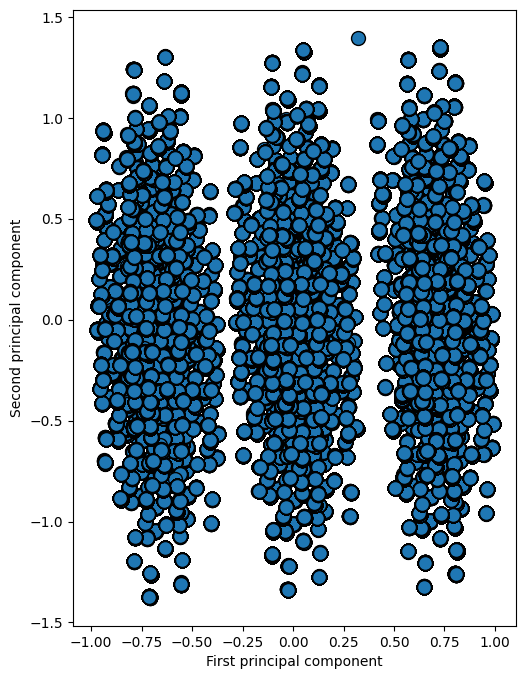

In [73]:
# INITIAL CODE --> NO NEED TO RUN
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components=2)
pca.fit(scaled_df)

data_pca = pca.transform(scaled_df)

# ploting the first vs. second principal component
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1])

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

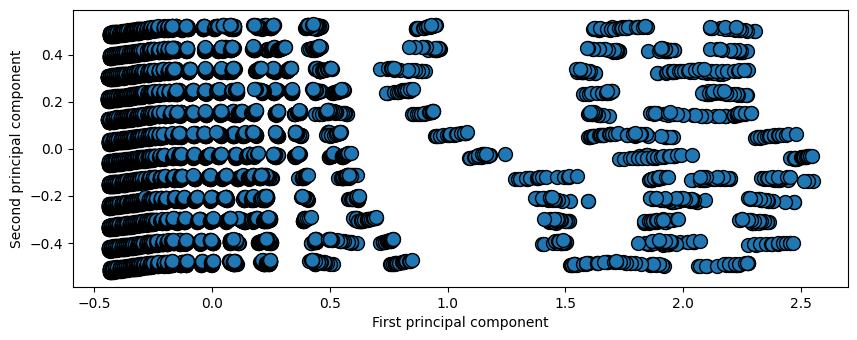

In [64]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components=2)
pca.fit(scaled_df)

data_pca = pca.transform(scaled_df)

# ploting the first vs. second principal component
plt.figure(figsize=(10, 10))
mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1])

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [74]:
# INITIAL CODE --> NO NEED TO RUN
print("Original shape: {}".format(str(scaled_df.shape)))
print("Reduced shape: {}".format(str(data_pca.shape)))

Original shape: (8535427, 22)
Reduced shape: (8535427, 2)


In [65]:
print("Original shape: {}".format(str(scaled_df.shape)))
print("Reduced shape: {}".format(str(data_pca.shape)))

Original shape: (10767, 14)
Reduced shape: (10767, 2)


## GMM Clustering

Text(0, 0.5, 'Second principal component')

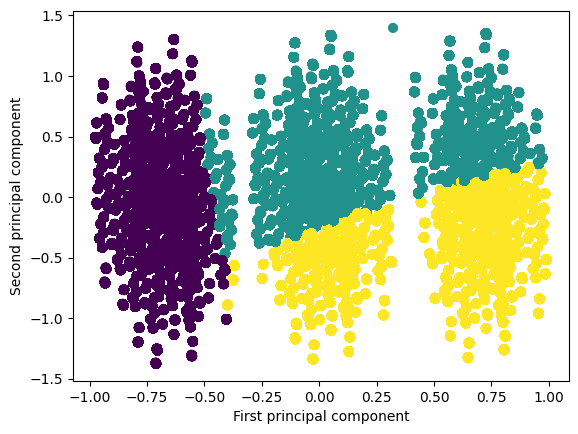

In [83]:
# INITIAL CODE --> NO NEED TO RUN
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42, init_params='random_from_data')
gmm.fit(data_pca)
labels = gmm.predict(data_pca)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, s=40, cmap='viridis');
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

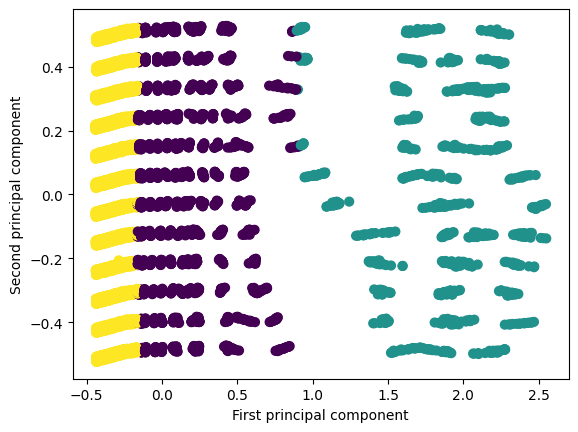

In [67]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42, init_params='random_from_data')
gmm.fit(data_pca)
gmm_labels = gmm.predict(data_pca)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=gmm_labels, s=40, cmap='viridis');
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## K-Means Clustering

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'First principal component')

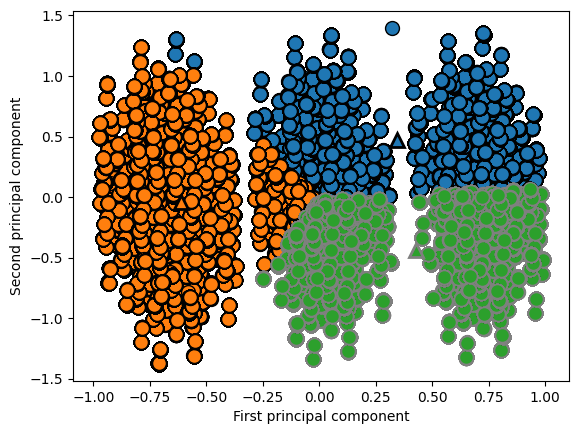

In [86]:
# INITIAL CODE --> NO NEED TO RUN
from sklearn.cluster import KMeans

# We can see from the above graph that there are 3 distinct clusters. Therefore using n = 3

pca_kmeans = KMeans(n_clusters=3)
pca_kmeans.fit(data_pca) 

mglearn.discrete_scatter(data_pca[:,0], data_pca[:, 1], pca_kmeans.labels_, markers='o')
mglearn.discrete_scatter(pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)
plt.ylabel("Second principal component")
plt.xlabel("First principal component")


/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'First principal component')

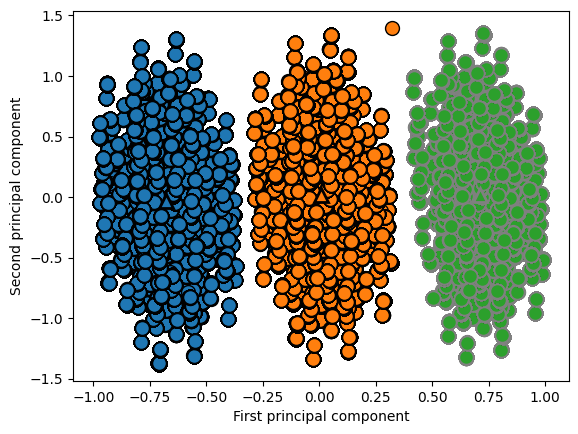

In [81]:
# INITIAL CODE --> NO NEED TO RUN
# Since we can see the clusters, let's initialize the cluster centers
initial_cluster_centers = np.array([[-0.75,0.0], [0.0,0.0], [0.75, 0.0]], np.float32)

pca_kmeans2 = KMeans(n_clusters=3, init=initial_cluster_centers)
pca_kmeans2.fit(data_pca) 

mglearn.discrete_scatter(data_pca[:,0], data_pca[:, 1], pca_kmeans2.labels_, markers='o')
mglearn.discrete_scatter(pca_kmeans2.cluster_centers_[:, 0], pca_kmeans2.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)
plt.ylabel("Second principal component")
plt.xlabel("First principal component")

In [89]:
# INITIAL CODE --> NO NEED TO RUN
pca_kmeans2.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [90]:
# INITIAL CODE --> NO NEED TO RUN
# using this Cluster ID as a new feature
scaled_df['Cluster_ID'] = pca_kmeans2.labels_
scaled_df['Cluster_ID'] = scaled_df['Cluster_ID'].astype('int8')

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'First principal component')

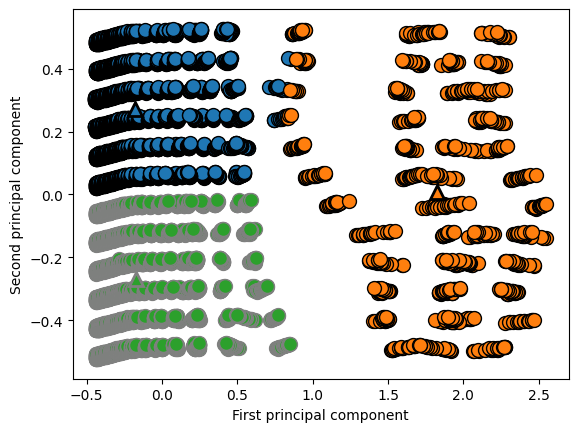

In [68]:
# Running K-Means from Apple PCA data
from sklearn.cluster import KMeans

pca_kmeans = KMeans(n_clusters=3)
pca_kmeans.fit(data_pca) 

mglearn.discrete_scatter(data_pca[:,0], data_pca[:, 1], pca_kmeans.labels_, markers='o')
mglearn.discrete_scatter(pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)
plt.ylabel("Second principal component")
plt.xlabel("First principal component")


We can see that the Gaussian mixture model has performed better as compared to the K-Means model as shown above. Therefore, let us use the Cluster ID from this GMM model as a new feature for our supervised learning model.

In [69]:
scaled_df['Cluster_ID'] = gmm_labels
scaled_df['Cluster_ID'] = scaled_df['Cluster_ID'].astype('int8')
scaled_df.head()

,daily_price_change_percent,open,high,low,adj_close,close,volume,daily_price_change,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days,year,month,day,Cluster_ID
date,,,,,,,,,,,,,,,
1981-03-10,-0.005555,0.000262,0.000259,0.000263,0.000203,0.000261,0.003824,0.410640,0.000312,0.000324,0.000379,0.0,0.181818,0.300000,2
1981-03-11,-0.011560,0.000245,0.000242,0.000243,0.000187,0.000242,0.004023,0.410608,0.000295,0.000316,0.000376,0.0,0.181818,0.333333,2
1981-03-12,0.000000,0.000259,0.000259,0.000263,0.000203,0.000261,0.007983,0.410673,0.000283,0.000309,0.000375,0.0,0.181818,0.366667,2
1981-03-13,-0.005618,0.000256,0.000253,0.000257,0.000198,0.000256,0.031166,0.410640,0.000271,0.000303,0.000373,0.0,0.181818,0.400000,2
1981-03-16,0.000000,0.000273,0.000276,0.000277,0.000214,0.000276,0.005016,0.410673,0.000262,0.000299,0.000372,0.0,0.181818,0.500000,2


In [70]:
scaled_df['Cluster_ID'].value_counts()

Cluster_ID
2    6802
0    3046
1     919
Name: count, dtype: int64

## Splitting The Data
In this project, I will create three sets: <br>
1.	Training set (70%) <br>
2.	Validation Test (15%) <br>
3.	Testing set (15%) <br>

In [71]:
# Calculating the sizes for each set
total_size = len(scaled_df)
train_size = int(0.7 * total_size)
val_size = test_size = int(0.15 * total_size)

# Spliting the data into the three sets as mentioned above
train_set = scaled_df.iloc[:train_size]
val_set = scaled_df.iloc[train_size:train_size + val_size]
test_set = scaled_df.iloc[train_size + val_size:]

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Testing set size: {len(test_set)}")

Training set size: 7536
Validation set size: 1615
Testing set size: 1616


In [72]:
train_set.index

DatetimeIndex(['1981-03-10', '1981-03-11', '1981-03-12', '1981-03-13',
               '1981-03-16', '1981-03-17', '1981-03-18', '1981-03-19',
               '1981-03-20', '1981-03-23',
               ...
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-10',
               '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14',
               '2011-01-18', '2011-01-19'],
              dtype='datetime64[ns]', name='date', length=7536, freq=None)

In [73]:
val_set.index

DatetimeIndex(['2011-01-20', '2011-01-21', '2011-01-24', '2011-01-25',
               '2011-01-26', '2011-01-27', '2011-01-28', '2011-01-31',
               '2011-02-01', '2011-02-02',
               ...
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20'],
              dtype='datetime64[ns]', name='date', length=1615, freq=None)

In [74]:
test_set.index

DatetimeIndex(['2017-06-21', '2017-06-22', '2017-06-23', '2017-06-26',
               '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30',
               '2017-07-03', '2017-07-05',
               ...
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20'],
              dtype='datetime64[ns]', name='date', length=1616, freq=None)

In [75]:
train_X = train_set.drop(columns=['close'])
train_y = train_set['close']
train_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7536 entries, 1981-03-10 to 2011-01-19
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   daily_price_change_percent  7536 non-null   float64
 1   open                        7536 non-null   float64
 2   high                        7536 non-null   float64
 3   low                         7536 non-null   float64
 4   adj_close                   7536 non-null   float64
 5   volume                      7536 non-null   float64
 6   daily_price_change          7536 non-null   float64
 7   Moving Avg 7 Days           7536 non-null   float64
 8   Moving Avg 30 Days          7536 non-null   float64
 9   Moving Avg 60 Days          7536 non-null   float64
 10  year                        7536 non-null   float64
 11  month                       7536 non-null   float64
 12  day                         7536 non-null   float64
 13  Cluster_ID     

In [76]:
# similarly for validation set
val_X = val_set.drop(columns=['close'])
val_y = val_set['close']

# similar for test set
test_X = test_set.drop(columns=['close'])
test_y = test_set['close']

## Reviewing Correlation

In [77]:
corr_matrix = scaled_df.corr()
corr_matrix.style.background_gradient()

,daily_price_change_percent,open,high,low,adj_close,close,volume,daily_price_change,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days,year,month,day,Cluster_ID
daily_price_change_percent,1.000000,0.020937,0.023096,0.023402,0.025450,0.025639,-0.009513,0.285092,0.021851,0.021415,0.021939,0.032496,-0.015449,-0.017023,-0.015587
open,0.020937,1.000000,0.999946,0.999934,0.999624,0.999863,-0.241050,0.048940,0.999734,0.998353,0.996722,0.667817,0.017451,-0.001341,-0.370603
high,0.023096,0.999946,1.000000,0.999921,0.999704,0.999935,-0.240627,0.056508,0.999738,0.998418,0.996841,0.667661,0.017260,-0.001283,-0.370204
low,0.023402,0.999934,0.999921,1.000000,0.999701,0.999938,-0.241735,0.057429,0.999670,0.998209,0.996580,0.667850,0.017460,-0.001148,-0.370818
adj_close,0.025450,0.999624,0.999704,0.999701,1.000000,0.999768,-0.243077,0.065858,0.999426,0.998076,0.996554,0.656258,0.017341,-0.001242,-0.352928
close,0.025639,0.999863,0.999935,0.999938,0.999768,1.000000,-0.241195,0.065456,0.999649,0.998255,0.996674,0.667737,0.017327,-0.001249,-0.370477
volume,-0.009513,-0.241050,-0.240627,-0.241735,-0.243077,-0.241195,1.000000,-0.022526,-0.240769,-0.239888,-0.239606,0.107789,-0.059727,-0.011081,-0.039197
daily_price_change,0.285092,0.048940,0.056508,0.057429,0.065858,0.065456,-0.022526,1.000000,0.052065,0.051161,0.054120,0.033346,-0.006468,0.005452,-0.013630
Moving Avg 7 Days,0.021851,0.999734,0.999738,0.999670,0.999426,0.999649,-0.240769,0.052065,1.000000,0.998927,0.997328,0.667689,0.017193,-0.000985,-0.370422
Moving Avg 30 Days,0.021415,0.998353,0.998418,0.998209,0.998076,0.998255,-0.239888,0.051161,0.998927,1.000000,0.999125,0.667181,0.016888,-0.000766,-0.370114


We can see that open, high, low, close, adj_close all have very high correlation between each other. <br>
Since we are interested in only the close price, we can drop the other columns like - open, high, low and adj_close. After this let us see the correlation matrix again.

In [78]:
new_scaled_df = scaled_df.drop(columns=['open', 'high', 'low', 'adj_close'])
corr_matrix = new_scaled_df.corr()
corr_matrix.style.background_gradient()

,daily_price_change_percent,close,volume,daily_price_change,Moving Avg 7 Days,Moving Avg 30 Days,Moving Avg 60 Days,year,month,day,Cluster_ID
daily_price_change_percent,1.000000,0.025639,-0.009513,0.285092,0.021851,0.021415,0.021939,0.032496,-0.015449,-0.017023,-0.015587
close,0.025639,1.000000,-0.241195,0.065456,0.999649,0.998255,0.996674,0.667737,0.017327,-0.001249,-0.370477
volume,-0.009513,-0.241195,1.000000,-0.022526,-0.240769,-0.239888,-0.239606,0.107789,-0.059727,-0.011081,-0.039197
daily_price_change,0.285092,0.065456,-0.022526,1.000000,0.052065,0.051161,0.054120,0.033346,-0.006468,0.005452,-0.013630
Moving Avg 7 Days,0.021851,0.999649,-0.240769,0.052065,1.000000,0.998927,0.997328,0.667689,0.017193,-0.000985,-0.370422
Moving Avg 30 Days,0.021415,0.998255,-0.239888,0.051161,0.998927,1.000000,0.999125,0.667181,0.016888,-0.000766,-0.370114
Moving Avg 60 Days,0.021939,0.996674,-0.239606,0.054120,0.997328,0.999125,1.000000,0.666459,0.016810,-0.000688,-0.369838
year,0.032496,0.667737,0.107789,0.033346,0.667689,0.667181,0.666459,1.000000,-0.014740,-0.002395,-0.750839
month,-0.015449,0.017327,-0.059727,-0.006468,0.017193,0.016888,0.016810,-0.014740,1.000000,-0.002222,-0.012306
day,-0.017023,-0.001249,-0.011081,0.005452,-0.000985,-0.000766,-0.000688,-0.002395,-0.002222,1.000000,0.002922


In [79]:
# Removing 'Moving Avg 7 Days' & 'Moving Avg 60 Days'
new_scaled_df = new_scaled_df.drop(columns=['Moving Avg 7 Days', 'Moving Avg 30 Days'])
corr_matrix = new_scaled_df.corr()
corr_matrix.style.background_gradient()

,daily_price_change_percent,close,volume,daily_price_change,Moving Avg 60 Days,year,month,day,Cluster_ID
daily_price_change_percent,1.000000,0.025639,-0.009513,0.285092,0.021939,0.032496,-0.015449,-0.017023,-0.015587
close,0.025639,1.000000,-0.241195,0.065456,0.996674,0.667737,0.017327,-0.001249,-0.370477
volume,-0.009513,-0.241195,1.000000,-0.022526,-0.239606,0.107789,-0.059727,-0.011081,-0.039197
daily_price_change,0.285092,0.065456,-0.022526,1.000000,0.054120,0.033346,-0.006468,0.005452,-0.013630
Moving Avg 60 Days,0.021939,0.996674,-0.239606,0.054120,1.000000,0.666459,0.016810,-0.000688,-0.369838
year,0.032496,0.667737,0.107789,0.033346,0.666459,1.000000,-0.014740,-0.002395,-0.750839
month,-0.015449,0.017327,-0.059727,-0.006468,0.016810,-0.014740,1.000000,-0.002222,-0.012306
day,-0.017023,-0.001249,-0.011081,0.005452,-0.000688,-0.002395,-0.002222,1.000000,0.002922
Cluster_ID,-0.015587,-0.370477,-0.039197,-0.013630,-0.369838,-0.750839,-0.012306,0.002922,1.000000


# Model Selection
## Classical Machine Learning Model
### Random Forest Regressor

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# rf_regressor = RandomForestRegressor(n_estimators=10, random_state=23, oob_score=True)
# rf_regressor.fit(train_X, train_y)

After more than 2800 minutes of training the model (45 hours) I have no option but to abandon training the model on the entire dataset. Therefore, I will re-try to train the models on all a subset of the data – only on the Apple stock.

In [80]:
len(scaled_df)

10767

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=23, verbose=1, criterion='friedman_mse', oob_score=True)
rf_regressor.fit(train_X, train_y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


RandomForestRegressor(criterion='friedman_mse', max_depth=10, oob_score=True,
                      random_state=23, verbose=1)

In [82]:
train_predicted = rf_regressor.predict(train_X)
print(train_predicted)

[0.00025988 0.00024097 0.00025988 ... 0.06272762 0.06163123 0.0616921 ]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[Text(0.5855212832973362, 0.9545454545454546, 'x[4] <= 0.016\nfriedman_mse = 0.0\nsamples = 4785\nvalue = 0.006'),
 Text(0.3258020608351332, 0.8636363636363636, 'x[4] <= 0.006\nfriedman_mse = 0.0\nsamples = 4277\nvalue = 0.003'),
 Text(0.17685835133189345, 0.7727272727272727, 'x[4] <= 0.003\nfriedman_mse = 0.0\nsamples = 3903\nvalue = 0.001'),
 Text(0.09215262778977681, 0.6818181818181818, 'x[2] <= 0.001\nfriedman_mse = 0.0\nsamples = 3640\nvalue = 0.001'),
 Text(0.04607631389488841, 0.5909090909090909, 'x[3] <= 0.001\nfriedman_mse = 0.0\nsamples = 1603\nvalue = 0.001'),
 Text(0.023038156947444204, 0.5, 'x[4] <= 0.0\nfriedman_mse = 0.0\nsamples = 991\nvalue = 0.0'),
 Text(0.011519078473722102, 0.4090909090909091, 'x[4] <= 0.0\nfriedman_mse = 0.0\nsamples = 493\nvalue = 0.0'),
 Text(0.005759539236861051, 0.3181818181818182, 'x[4] <= 0.0\nfriedman_mse = 0.0\nsamples = 214\nvalue = 0.0'),
 Text(0.0028797696184305254, 0.22727272727272727, 'x[2] <= 0.0\nfriedman_mse = 0.0\nsamples = 95\nval

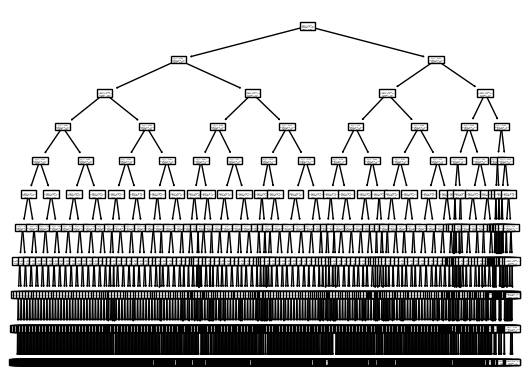

In [83]:
# Plotting the regression tree of the first random forest
from sklearn import tree
tree.plot_tree(rf_regressor.estimators_[0])

It looks like a very complex random forest model with a lot of child nodes and a high depth.

In [84]:
close_price = pd.DataFrame()
close_price['real close'] = train_set['close']
close_price['pred close'] = train_predicted
close_price.head(-10)

,real close,pred close
date,,
1981-03-10,0.000261,0.000260
1981-03-11,0.000242,0.000241
1981-03-12,0.000261,0.000260
1981-03-13,0.000256,0.000255
1981-03-16,0.000276,0.000274
...,...,...
2010-12-29,0.058902,0.058916
2010-12-30,0.058606,0.058669
2010-12-31,0.058406,0.058485


From the above image, we can see that the predicted values are very close to the actual data.

### Metrics to Evaluate the Random Forest Model
To understand how well this model performs, I have used mean squared error, root mean squared error and r squared metrics.

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf_mean_sq_err = mean_squared_error(train_y, train_predicted)
r2 = r2_score(train_y,train_predicted)
print(f"The Mean Squared Error for Training Set is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error for Training Set is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score for Training Set is {r2}")

The Mean Squared Error for Training Set is 3.961628827077018e-10
The Root Mean Squared Error for Training Set is 1.9903840903396055e-05
The R2 score for Training Set is 0.9999967815350055


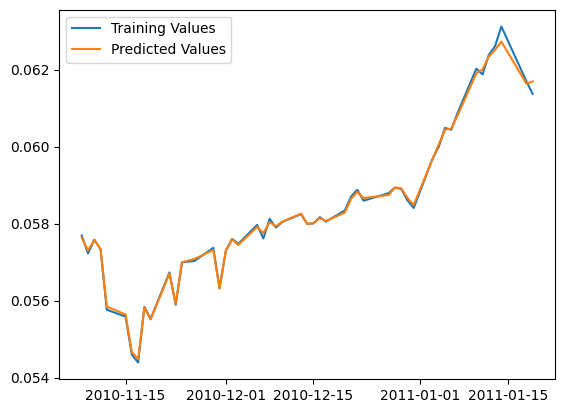

In [86]:
plt.plot(close_price.index[-50:], close_price['real close'][-50:])
plt.plot(close_price.index[-50:], close_price['pred close'][-50:])
plt.legend(['Training Values', 'Predicted Values'])

In [87]:
# Let us now predict the data for the validation set
val_predicted = rf_regressor.predict(val_X)
rf_mean_sq_err = mean_squared_error(val_y, val_predicted)
r2 = r2_score(val_y,val_predicted)
print(f"The Mean Squared Error for Validation Set is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error for Validation Set is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score for Validation Set is {r2}")

The Mean Squared Error for Validation Set is 0.003964161198197244
The Root Mean Squared Error for Validation Set is 0.06296158509914791
The R2 score for Validation Set is -2.3502508925967356


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [88]:
# validation & predictions
validation_close_price = pd.DataFrame()
validation_close_price['real'] = val_set['close']
validation_close_price['pred'] = val_predicted
validation_close_price.head(-10)

,real,pred
date,,
2011-01-20,0.060246,0.061307
2011-01-21,0.059162,0.061037
2011-01-24,0.061113,0.061204
2011-01-25,0.061831,0.061840
2011-01-26,0.062277,0.062179
...,...,...
2017-05-31,0.194199,0.062646
2017-06-01,0.194734,0.062014
2017-06-02,0.197623,0.062007


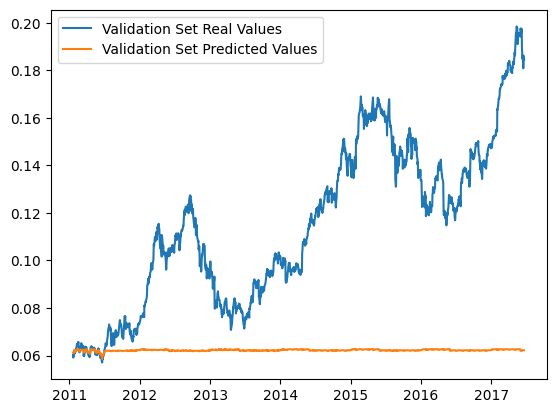

In [89]:
plt.plot(validation_close_price.index, validation_close_price['real'])
plt.plot(validation_close_price.index, validation_close_price['pred'])
plt.legend(['Validation Set Real Values', 'Validation Set Predicted Values'])

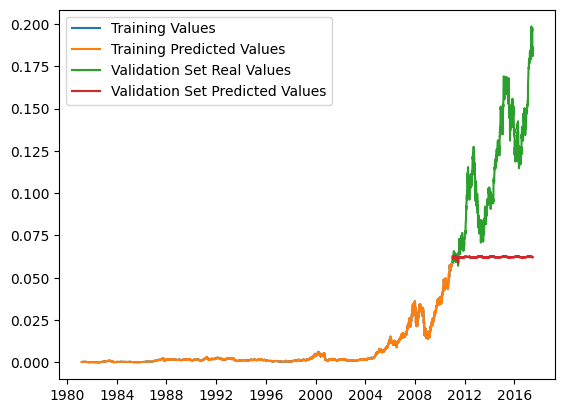

In [90]:
# plotting training & training predictions
plt.plot(close_price.index, close_price['real close'])
plt.plot(close_price.index, close_price['pred close'])


# plotting validation & validation predictions
plt.plot(validation_close_price.index, validation_close_price['real'])
plt.plot(validation_close_price.index, validation_close_price['pred'])

plt.legend(['Training Values', 'Training Predicted Values', 'Validation Set Real Values', 'Validation Set Predicted Values'])

My intuition is that the training dataset does not generalize well to the validation data set. The data from 1980 up to around 2011 is mostly flat with only a few sharp increases. However, from 2012, we can see with the green line, that the closing price for Apple stock is sharply increasing.

To fix the model we will go back and recreate our train, validation, and test split but this time we will take the data only from 2006 onwards.

In [92]:
print('We have data from '+str(new_scaled_df.index.min())+' up to '+str(new_scaled_df.index.max()))

We have data from 1981-03-10 00:00:00 up to 2023-11-20 00:00:00


In [94]:
type(new_scaled_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [110]:
# disregarding data before 2018.
new_scaled_df = new_scaled_df[pd.to_datetime('2017-12-31 00:00:00'):]
new_scaled_df.head(-10)

,daily_price_change_percent,close,volume,daily_price_change,Moving Avg 60 Days,year,month,day,Cluster_ID
date,,,,,,,,,
2018-01-02,0.012191,0.219021,0.013774,0.441125,0.225159,0.880952,0.000000,0.033333,0
2018-01-03,-0.001742,0.218983,0.015909,0.406322,0.225538,0.880952,0.000000,0.066667,0
2018-01-04,0.002832,0.220001,0.012091,0.417779,0.225922,0.880952,0.000000,0.100000,0
2018-01-05,0.008914,0.222509,0.012752,0.433295,0.226349,0.880952,0.000000,0.133333,0
2018-01-08,0.000000,0.221681,0.011085,0.410673,0.226747,0.880952,0.000000,0.233333,0
...,...,...,...,...,...,...,...,...,...
2023-10-31,0.008315,0.869247,0.006043,0.493039,0.948266,1.000000,0.818182,1.000000,1
2023-11-01,0.017072,0.885540,0.007671,0.582947,0.947745,1.000000,0.909091,0.000000,1
2023-11-02,0.011545,0.903870,0.010420,0.529583,0.947690,1.000000,0.909091,0.033333,1


In [112]:
# Calculating the sizes for each set again
total_size = len(new_scaled_df)
train_size = int(0.8 * total_size)
val_size = test_size = int(0.1 * total_size)

# Spliting the data into the three sets as mentioned above
train_set = new_scaled_df.iloc[:train_size]
val_set = new_scaled_df.iloc[train_size:train_size + val_size]
test_set = new_scaled_df.iloc[train_size + val_size:]

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Testing set size: {len(test_set)}")

Training set size: 1185
Validation set size: 148
Testing set size: 149


In [113]:
# training X & y
train_X = train_set.drop(columns=['close'])
train_y = train_set['close']

# validatiojn X & y
val_X = val_set.drop(columns=['close'])
val_y = val_set['close']

# test X & y
test_X = test_set.drop(columns=['close'])
test_y = test_set['close']

### Random Forest Regressor Model 2

In [116]:
rf_regressor2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23, verbose=0, criterion='friedman_mse', oob_score=True)
rf_regressor2.fit(train_X, train_y)

RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_estimators=20,
                      oob_score=True, random_state=23)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.469\nfriedman_mse = 0.056\nsamples = 759\nvalue = 0.479'),
 Text(0.25, 0.75, 'x[3] <= 0.296\nfriedman_mse = 0.005\nsamples = 432\nvalue = 0.286'),
 Text(0.125, 0.5833333333333334, 'x[3] <= 0.261\nfriedman_mse = 0.001\nsamples = 309\nvalue = 0.246'),
 Text(0.0625, 0.4166666666666667, 'x[5] <= 0.227\nfriedman_mse = 0.0\nsamples = 187\nvalue = 0.232'),
 Text(0.03125, 0.25, 'x[3] <= 0.232\nfriedman_mse = 0.0\nsamples = 76\nvalue = 0.217'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 65\nvalue = 0.221'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 11\nvalue = 0.195'),
 Text(0.09375, 0.25, 'x[3] <= 0.231\nfriedman_mse = 0.0\nsamples = 111\nvalue = 0.242'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 19\nvalue = 0.219'),
 Text(0.109375, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 92\nvalue = 0.246'),
 Text(0.1875, 0.4166666666666667, 'x[5] <= 0.864\nfriedman_mse = 0.001\ns

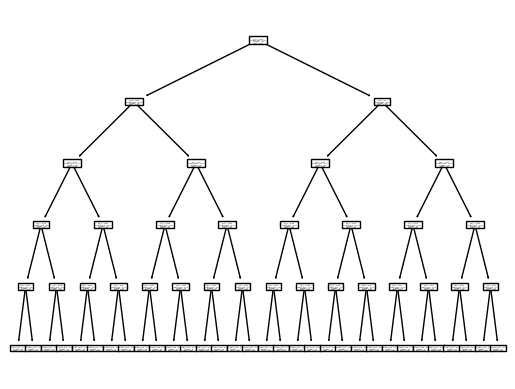

In [117]:
# Plotting the regression tree of the first random forest
tree.plot_tree(rf_regressor2.estimators_[0])

In [118]:
# Model predicting values on Training Set
rf2_train_predicted = rf_regressor2.predict(train_X)

# Evaluating rf_regressor2 model
rf_mean_sq_err = mean_squared_error(train_y, rf2_train_predicted)
r2 = r2_score(train_y,rf2_train_predicted)
print('Evaluating rf_regressor2 model:')
print(f"The Mean Squared Error for Training Set is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error for Training Set is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score for Training Set is {r2}")

Evaluating rf_regressor2 model:
The Mean Squared Error for Training Set is 0.0004669893312075796
The Root Mean Squared Error for Training Set is 0.02160993593714659
The R2 score for Training Set is 0.9915586482080094


In [119]:
rf2_close_prices = pd.DataFrame()
rf2_close_prices['real'] = train_y
rf2_close_prices['pred'] = rf2_train_predicted
rf2_close_prices.head(-10)

,real,pred
date,,
2018-01-02,0.219021,0.217520
2018-01-03,0.218983,0.217520
2018-01-04,0.220001,0.217520
2018-01-05,0.222509,0.217520
2018-01-08,0.221681,0.217520
...,...,...
2022-08-25,0.865479,0.778606
2022-08-26,0.832842,0.778606
2022-08-29,0.821437,0.778606


In [120]:
# Model predicting values on Validation Set
rf2_val_predicted = rf_regressor2.predict(val_X)

# Evaluating rf_regressor2 model
rf_mean_sq_err = mean_squared_error(val_y, rf2_val_predicted)
r2 = r2_score(val_y,rf2_val_predicted)
print('Evaluating rf_regressor2 model on validation set:')
print(f"The Mean Squared Error for Validation Set is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error for Validation Set is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score for Validation Set is {r2}")

Evaluating rf_regressor2 model on validation set:
The Mean Squared Error for Validation Set is 0.011779656266548946
The Root Mean Squared Error for Validation Set is 0.10853412489419605
The R2 score for Validation Set is -3.878194625298546


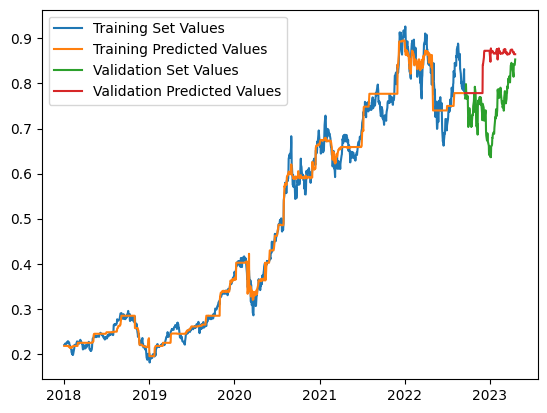

In [121]:
rf2_close_prices_val = pd.DataFrame()
rf2_close_prices_val['real'] = val_y
rf2_close_prices_val['pred'] = rf2_val_predicted

# plotting training & training predictions
plt.plot(rf2_close_prices.index, rf2_close_prices['real'])
plt.plot(rf2_close_prices.index, rf2_close_prices['pred'])


# plotting validation & validation predictions
plt.plot(rf2_close_prices_val.index, rf2_close_prices_val['real'])
plt.plot(rf2_close_prices_val.index, rf2_close_prices_val['pred'])

plt.legend(['Training Set Values', 'Training Predicted Values', 'Validation Set Values', 'Validation Predicted Values'])

In [172]:
# Model predicting values on Test Set
rf2_test_predicted = rf_regressor2.predict(test_X)

# Evaluating rf_regressor2 model
rf_mean_sq_err = mean_squared_error(test_y, rf2_test_predicted)
r2 = r2_score(test_y,rf2_test_predicted)
print('Evaluating rf_regressor2 model on test set:')
print(f"The Mean Squared Error for Test Set is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error for Test Set is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score for Test Set is {r2}")

Evaluating rf_regressor2 model on test set:
The Mean Squared Error for Test Set is 0.02517503785379102
The Root Mean Squared Error for Test Set is 0.1586664358135993
The R2 score for Test Set is -13.95744422945438


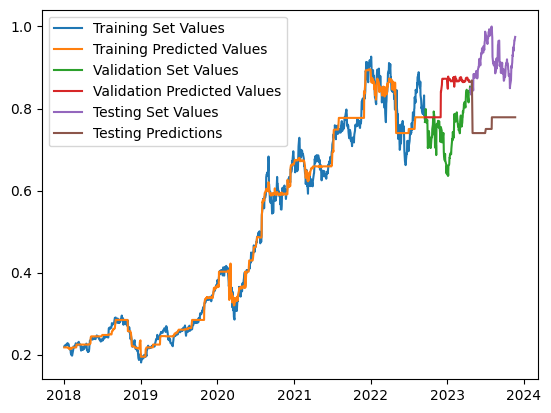

In [173]:
rf2_close_prices_test = pd.DataFrame(data={'real': test_y, 'pred': rf2_test_predicted})

# plotting training & training predictions
plt.plot(rf2_close_prices.index, rf2_close_prices['real'])
plt.plot(rf2_close_prices.index, rf2_close_prices['pred'])

# plotting validation & validation predictions
plt.plot(rf2_close_prices_val.index, rf2_close_prices_val['real'])
plt.plot(rf2_close_prices_val.index, rf2_close_prices_val['pred'])

# plotting testing & testing predictions
plt.plot(rf2_close_prices_test.index, rf2_close_prices_test['real'])
plt.plot(rf2_close_prices_test.index, rf2_close_prices_test['pred'])

plt.legend(['Training Set Values', 'Training Predicted Values', 'Validation Set Values', 'Validation Predicted Values', 'Testing Set Values', 'Testing Predictions'])

### XGBoost Regression

In [129]:
!pip install xgboost
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [124]:
import xgboost as xgb

xgboost_regressor = xgb.XGBRegressor(n_estimators = 20, max_depth = 5)
xgboost_regressor.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

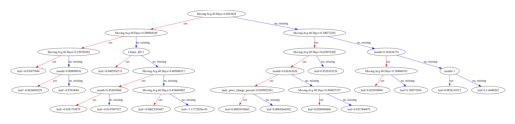

In [130]:
xgb.plot_tree(xgboost_regressor)

In [131]:
# XGBoost Model predicting values on Training Set
xgb_train_predicted = xgboost_regressor.predict(train_X)

# Evaluating rf_regressor2 model
rf_mean_sq_err = mean_squared_error(train_y, xgb_train_predicted)
r2 = r2_score(train_y, xgb_train_predicted)
print('Evaluating XGBoost model on Training Set:')
print(f"The Mean Squared Error is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score is {r2}")

Evaluating XGBoost model on Training Set:
The Mean Squared Error is 9.470218502635089e-05
The Root Mean Squared Error is 0.009731504766805127
The R2 score is 0.9982881526282187


In [132]:
# Model predicting values on Validation Set
xgb_val_predicted = xgboost_regressor.predict(val_X)

# Evaluating rf_regressor2 model
rf_mean_sq_err = mean_squared_error(val_y, xgb_val_predicted)
r2 = r2_score(val_y, xgb_val_predicted)
print('Evaluating XGBoost model on validation set:')
print(f"The Mean Squared Error for Validation Set is {rf_mean_sq_err}")
print(f"The Root Mean Squared Error for Validation Set is {np.sqrt(rf_mean_sq_err)}")
print(f"The R2 score for Validation Set is {r2}")

Evaluating XGBoost model on validation set:
The Mean Squared Error for Validation Set is 0.010207109422143262
The Root Mean Squared Error for Validation Set is 0.10103024013701671
The R2 score for Validation Set is -3.22697107591586


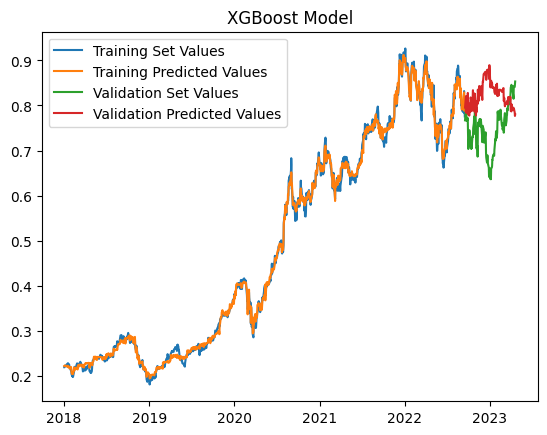

In [134]:
xgb_close_prices_train = pd.DataFrame()
xgb_close_prices_train['real'] = train_y
xgb_close_prices_train['pred'] = xgb_train_predicted

xgb_close_prices_val = pd.DataFrame()
xgb_close_prices_val['real'] = val_y
xgb_close_prices_val['pred'] = xgb_val_predicted

# plotting training values & predictions
plt.plot(xgb_close_prices_train.index, xgb_close_prices_train['real'])
plt.plot(xgb_close_prices_train.index, xgb_close_prices_train['pred'])


# plotting validation & validation predictions
plt.plot(xgb_close_prices_val.index, xgb_close_prices_val['real'])
plt.plot(xgb_close_prices_val.index, xgb_close_prices_val['pred'])

plt.title('XGBoost Model')
plt.legend(['Training Set Values', 'Training Predicted Values', 'Validation Set Values', 'Validation Predicted Values'])

In [160]:
# testing it with the test set
xgb_test_predicted = xgboost_regressor.predict(test_X)
xgb_close_prices_test = pd.DataFrame(data={'real':test_y, 'pred':xgb_test_predicted})

# Evaluating rf_regressor2 model on test data
xgb_mean_sq_err = mean_squared_error(test_y, xgb_test_predicted)
r2 = r2_score(test_y, xgb_test_predicted)
print('Evaluating XGBoost model on test set:')
print(f"The Mean Squared Error is {xgb_mean_sq_err}")
print(f"The Root Mean Squared Error is {np.sqrt(xgb_mean_sq_err)}")
print(f"The R2 score is {r2}")

Evaluating XGBoost model on test set:
The Mean Squared Error is 0.01597999311720448
The Root Mean Squared Error is 0.1264119975208227
The R2 score is -8.494319620324132


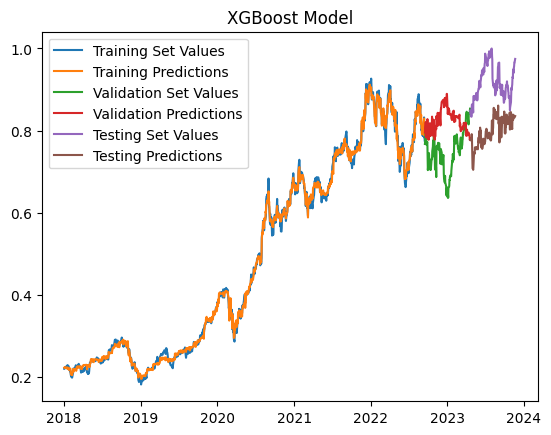

In [162]:
# plotting training values & predictions
plt.plot(xgb_close_prices_train.index, xgb_close_prices_train['real'])
plt.plot(xgb_close_prices_train.index, xgb_close_prices_train['pred'])


# plotting validation & validation predictions
plt.plot(xgb_close_prices_val.index, xgb_close_prices_val['real'])
plt.plot(xgb_close_prices_val.index, xgb_close_prices_val['pred'])

# plotting testing & predictions
plt.plot(xgb_close_prices_test.index, xgb_close_prices_test['real'])
plt.plot(xgb_close_prices_test.index, xgb_close_prices_test['pred'])

plt.title("XGBoost Model")
plt.legend(['Training Set Values', 'Training Predictions', 'Validation Set Values', 'Validation Predictions', 'Testing Set Values', 'Testing Predictions'])

## Deep Learning Model
### Long Term Short Term Memory (LSTMs)

In [139]:
!pip install tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-macosx_12_0_arm64.whl.metadata (2.6 kB)
  Using cached tensorflow_macos-2.13.0-cp38-cp38-macosx_12_0_arm64.whl.metadata (3.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadat

In [143]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [147]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Input((train_X.shape[1], 1))) # train_X.shape[1] returns the number of attributes in the train set
lstm_model.add(LSTM(64))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1))

In [148]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
from keras.callbacks import ModelCheckpoint
# Creating a checkpoint to save the best model
check_point_lstm = ModelCheckpoint('lstm_model/', save_best_only=True)

In [151]:
# Compiling the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [152]:
# Train the model
lstm_model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=10, callbacks=[check_point_lstm])

Epoch 1/10
18/38 [=============>................] - ETA: 0s - loss: 0.1421 INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 2s 35ms/step - loss: 0.0888 - val_loss: 0.0508
Epoch 2/10
19/38 [==============>...............] - ETA: 0s - loss: 0.0257INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 33ms/step - loss: 0.0252 - val_loss: 0.0341
Epoch 3/10
21/38 [===============>..............] - ETA: 0s - loss: 0.0198INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 25ms/step - loss: 0.0186 - val_loss: 0.0208
Epoch 4/10
21/38 [===============>..............] - ETA: 0s - loss: 0.0157INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 26ms/step - loss: 0.0148 - val_loss: 0.0154
Epoch 5/10
19/38 [==============>...............] - ETA: 0s - loss: 0.0131INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 27ms/step - loss: 0.0121 - val_loss: 0.0109
Epoch 6/10
38/38 [==============================] - ETA: 0s - loss: 0.0114INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 26ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 7/10
37/38 [============================>.] - ETA: 0s - loss: 0.0089INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 33ms/step - loss: 0.0089 - val_loss: 0.0075
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0144
Epoch 9/10
23/38 [=================>............] - ETA: 0s - loss: 0.0114INFO:tensorflow:Assets written to: lstm_model/assets


INFO:tensorflow:Assets written to: lstm_model/assets


38/38 [==============================] - 1s 25ms/step - loss: 0.0102 - val_loss: 0.0061
Epoch 10/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0124


In [153]:
# Loading the best model
from tensorflow.keras.models import load_model
lstm_model = load_model('lstm_model/')

In [164]:
lstm_train_preds = lstm_model.predict(train_X).flatten()
lstm_close_price_df = pd.DataFrame(data={'real':train_y, 'pred':lstm_train_preds})
lstm_close_price_df

38/38 [==============================] - 0s 886us/step


,real,pred
date,,
2018-01-02,0.219021,0.221377
2018-01-03,0.218983,0.215586
2018-01-04,0.220001,0.219154
2018-01-05,0.222509,0.224263
2018-01-08,0.221681,0.223639
...,...,...
2022-09-09,0.801019,0.796799
2022-09-12,0.831874,0.830879
2022-09-13,0.783046,0.690021


In [165]:
lstm_val_preds = lstm_model.predict(val_X).flatten()
lstm_valclose_price_df = pd.DataFrame(data={'real':val_y, 'pred':lstm_val_preds})
lstm_valclose_price_df

5/5 [==============================] - 0s 1ms/step


,real,pred
date,,
2022-09-16,0.767058,0.770889
2022-09-19,0.786304,0.846008
2022-09-20,0.798626,0.822503
2022-09-21,0.782435,0.728404
2022-09-22,0.777445,0.778566
...,...,...
2023-04-13,0.842720,0.769361
2023-04-14,0.840938,0.722581
2023-04-17,0.841039,0.720218


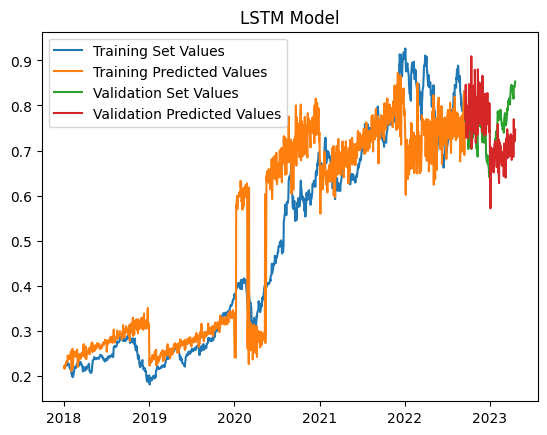

In [166]:
# plotting training values & predictions
plt.plot(lstm_close_price_df.index, lstm_close_price_df['real'])
plt.plot(lstm_close_price_df.index, lstm_close_price_df['pred'])


# plotting validation & validation predictions
plt.plot(lstm_valclose_price_df.index, lstm_valclose_price_df['real'])
plt.plot(lstm_valclose_price_df.index, lstm_valclose_price_df['pred'])

plt.title('LSTM Model')
plt.legend(['Training Set Values', 'Training Predicted Values', 'Validation Set Values', 'Validation Predicted Values'])

In [167]:
lstm_test_preds = lstm_model.predict(test_X).flatten()
lstm_test_close_price_df = pd.DataFrame(data={'real':test_y, 'pred':lstm_test_preds})
lstm_test_close_price_df

5/5 [==============================] - 0s 1ms/step


,real,pred
date,,
2023-04-20,0.848270,0.730918
2023-04-21,0.839970,0.724033
2023-04-24,0.841549,0.728192
2023-04-25,0.833606,0.707575
2023-04-26,0.833555,0.732932
...,...,...
2023-11-14,0.954124,0.820592
2023-11-15,0.957027,0.825774
2023-11-16,0.965682,0.824935


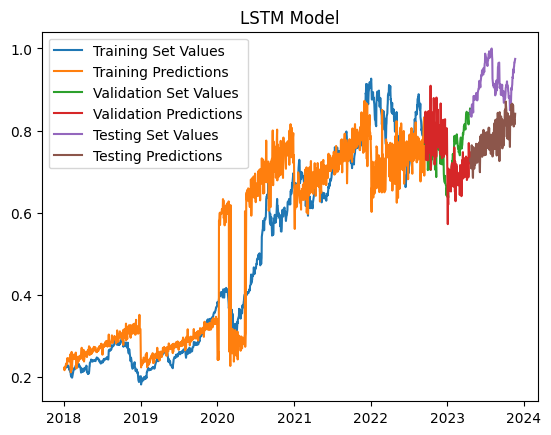

In [168]:
# plotting training values & predictions
plt.plot(lstm_close_price_df.index, lstm_close_price_df['real'])
plt.plot(lstm_close_price_df.index, lstm_close_price_df['pred'])

# plotting validation & validation predictions
plt.plot(lstm_valclose_price_df.index, lstm_valclose_price_df['real'])
plt.plot(lstm_valclose_price_df.index, lstm_valclose_price_df['pred'])

# plotting testing & testing predictions
plt.plot(lstm_test_close_price_df.index, lstm_test_close_price_df['real'])
plt.plot(lstm_test_close_price_df.index, lstm_test_close_price_df['pred'])

plt.title('LSTM Model')
plt.legend(['Training Set Values', 'Training Predictions', 'Validation Set Values', 'Validation Predictions', 'Testing Set Values', 'Testing Predictions'])


In [170]:
# Evaluating LSTM model on test data
lstm_mean_sq_err = mean_squared_error(train_y, lstm_train_preds)
r2 = r2_score(train_y, lstm_train_preds)
print('Evaluating the LSTM model on train set:')
print(f"The Mean Squared Error is {lstm_mean_sq_err}")
print(f"The Root Mean Squared Error is {np.sqrt(lstm_mean_sq_err)}")
print(f"The R2 score is {r2}")
print()

# Evaluating LSTM model on validation data
lstm_mean_sq_err = mean_squared_error(val_y, lstm_val_preds)
r2 = r2_score(val_y, lstm_val_preds)
print('Evaluating the LSTM model on validation set:')
print(f"The Mean Squared Error is {lstm_mean_sq_err}")
print(f"The Root Mean Squared Error is {np.sqrt(lstm_mean_sq_err)}")
print(f"The R2 score is {r2}")
print()

# Evaluating LSTM model on test data
lstm_mean_sq_err = mean_squared_error(test_y, lstm_test_preds)
r2 = r2_score(test_y, lstm_test_preds)
print('Evaluating the LSTM model on train set:')
print(f"The Mean Squared Error is {lstm_mean_sq_err}")
print(f"The Root Mean Squared Error is {np.sqrt(lstm_mean_sq_err)}")
print(f"The R2 score is {r2}")

Evaluating the LSTM model on train set:
The Mean Squared Error is 0.008012394646228717
The Root Mean Squared Error is 0.0895119804619958
The R2 score is 0.8551670511825595

Evaluating the LSTM model on validation set:
The Mean Squared Error is 0.006121489358902203
The Root Mean Squared Error is 0.07823994733447999
The R2 score is -1.5350329257245385

Evaluating the LSTM model on train set:
The Mean Squared Error is 0.020631585631008417
The Root Mean Squared Error is 0.14363699255765702
The R2 score is -11.258007047824574
